# Loan Grade Prediction Problem
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

## 1) Load and Review data

In [3]:
df = pd.read_csv('Raw_data/loans_full_schema.csv')
print(df.shape)
df.head(1).T

(10000, 55)


,0
emp_title,global config engineer
emp_length,3
state,NJ
homeownership,MORTGAGE
annual_income,90000
verified_income,Verified
debt_to_income,18.01
annual_income_joint,NaN
verification_income_joint,NaN
debt_to_income_joint,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

### Create Profiling Report

In [5]:
#import pandas_profiling
#from pandas_profiling.utils.cache import cache_file


#Create profiling report
#report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)

#Save report to file
#report.to_file(output_file= "loan_report.html")

## 2) Plot Functions

In [6]:
def plot_bars(x, y, plot_title, figsize, rot):
    plt.figure(figsize= figsize)
    bars= plt.bar(x = x, height= y,align='center')
    for bar in bars:
        plt.gca().text(bar.get_x() + bar.get_width()/2, 1.02 * bar.get_height(),
                      bar.get_height().round(2), ha= 'center', color= 'red', fontsize= 11)
        
    for spine in plt.gca().spines.values():
        spine.set_visible (False)

    plt.tick_params (top='off', bottom='off', left=False , right=False, labelleft=False, labelbottom='on') 

    plt.title(plot_title, color='red', fontsize=15)
    plt.xticks(fontsize=12, rotation= rot)
    
    return bars

In [7]:
def plot_hist(data, plot_title):
    hist = plt.hist(data, bins= 20)
    plt.axvline(data.mean(), label= 'mean= {}'.format(round(data.mean(),2), linestyle= 'dotted', color='red'))
    plt.axvline(data.median(), label= 'median= {}'.format(round(data.median(),2), linestyle= 'dotted', color='black'))            
    plt.title(plot_title, color='red', fontsize=15)
    plt.legend(fontsize=12)
    plt.ylabel('Frequency', fontsize=13)
    return hist

In [8]:
def plot_pie(values, labels, plot_title):
    pie= plt.figure(figsize=(5,5))
    plt.rcParams['font.size'] = 14
    pies= plt.pie(values, labels= labels, autopct= '%1.1f')
    plt.title(plot_title , fontsize= 16, color='brown')
    return pie

In [9]:
def plot_stackedbarh(small_df, y, y_ticks,plot_title):
    ax = small_df.plot.barh(stacked=True, figsize=(15, 5))
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate(str(round(width,2)), xy=(left+width/2, bottom+height/2), 
                    ha='center', va='center', fontsize= 12, color='black')
    plt.yticks(y, y_ticks, fontsize= 14)    
    plt.legend(loc= 'upper left', bbox_to_anchor= (1.02,1), fontsize=12)
    plt.title(plot_title, fontsize= 17, color= 'red')
    return ax


In [10]:
def plot_scatter(x, y, hue, x_label, y_label, plot_title):
    g = sns.scatterplot(x, y, hue= hue)
    plt.title(plot_title, color='red', fontsize=17)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    g.legend(loc= 2, bbox_to_anchor= (1.01,1), fontsize= 12)
    return g

In [11]:
def plot_kde(s, c, shade, label1):
    
    kde = sns.kdeplot(s, color= c, shade= shade, label= label1)   
    kde.axvline(s.mean(), linestyle= 'dashed', color= c, label= 'mean= {}'.format(round(s.mean()),1))
    plt.legend('upper left', bbox_to_anchor= (1.05,1))
    return kde
    

In [12]:
def plot_boxplot(x, y, ranks, vertical_offset, medians, y_label, plot_title, rot):
    
    
    
    bp = sns.boxplot(x, y, order= ranks, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})
  
    for xtick in bp.get_xticks():
        bp.text(xtick,medians[xtick] + vertical_offset, medians[xtick], 
           horizontalalignment='center',size= 'small',color='b',weight='semibold')
        
    plt.xticks(fontsize= 12, rotation= rot)
    plt.yticks(fontsize= 12)
    plt.ylabel(y_label, fontsize= 12)
    plt.xlabel('')
    plt.title(plot_title, fontsize= 18, color='red')
    return bp

In [13]:
def plot_line(df, y_label, plot_title):
    lines = df.plot.line(marker='o')
    plt.ylabel(y_label)
    plt.legend(fontsize= 12)
    plt.title(plot_title, color='r',fontsize=15)
    return lines

In [14]:
def plot_one_boxplot(s,figsize, plot_title): 
    bp = plt.figure(figsize= figsize)
    sns.boxplot(s)
    plt.title(plot_title, color='red', fontsize=15)
    return bp

In [15]:
def plot_violin(x,y, fgsize, plot_title):
    plt.figure(figsize= fgsize)
    vln = sns.violinplot(x,y)
    plt.title(plot_title, fontsize=15, color='red')
    return vln

-------------------

## 3) Features

### grade
Grade associated with the loan. 'A' grade loans represent the lowest risk while 'E' grade loans are the riskiest.

'Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.'
 
https://www.investopedia.com/terms/l/loangrading.asp#:~:text=Loan%20grading%20is%20a%20classification,to%20a%20portfolio%20of%20loans


In [16]:
grade= pd.DataFrame(round(100 * df.grade.value_counts(normalize=True, dropna= False),2)).reset_index()
grade.columns= ['grade','pct']
grade

,grade,pct
0,B,30.37
1,C,26.53
2,A,24.59
3,D,14.46
4,E,3.35
5,F,0.58
6,G,0.12


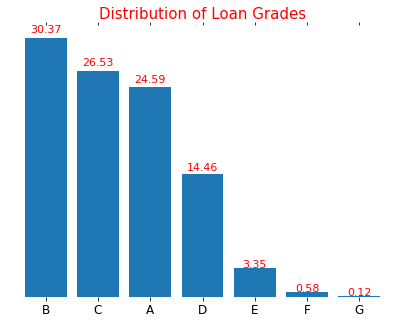

In [17]:
plot_bars(grade.grade, grade.pct, 'Distribution of Loan Grades', (7,5),0)
plt.show()

### More than 80% of borrowers had grade A, B, or C and about 4.5% had grade E,F, or G.

In [18]:
df['original_grade'] = df.grade

In [19]:
df.grade.replace({'E': 'EFG', 'F': 'EFG', 'G': 'EFG'}, inplace= True)

----------------------

### loan status

**Loan Status**

**Grace Period**: A grace period is a time period automatically granted on a loan during which the borrower does not have to pay the issuer any monies toward the loan, and the borrower does not incur any penalties for not paying. 

**Charge Off**: typically occurs when a loan is 120 days or more past due and there is no reasonable expectation of sufficient payment to prevent the charge off.

In [20]:
100 * df.loan_status.value_counts()

Current               937500
Fully Paid             44700
In Grace Period         6700
Late (31-120 days)      6600
Late (16-30 days)       3800
Charged Off              700
Name: loan_status, dtype: int64

In [21]:
loan_status = pd.DataFrame(100 * df.loan_status.value_counts(normalize= True, dropna= False)).reset_index()
loan_status.columns= ['loan_status','pct']
loan_status

,loan_status,pct
0,Current,93.75
1,Fully Paid,4.47
2,In Grace Period,0.67
3,Late (31-120 days),0.66
4,Late (16-30 days),0.38
5,Charged Off,0.07


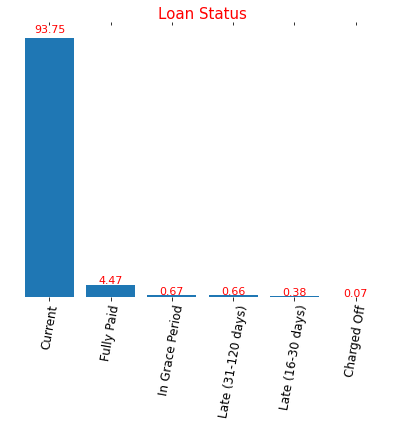

In [22]:
plot_bars(loan_status.loan_status, loan_status.pct, 'Loan Status',(7,5),80)
plt.show()

### Only 1.11% of loans were late from 16 to 120 days, or were charged off.

In [23]:
df['default']= 0
df.loc[df.loan_status == 'Charged Off', 'default'] = 1
df.loc[df.loan_status != 'Charged Off', 'default'] = 0

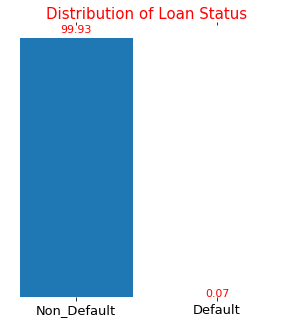

In [24]:
default = round(100 * df.default.value_counts(normalize= True, dropna= False),2)
plot_bars(default.index, default, 'Distribution of Loan Status',(5,5),0)
plt.xticks([0,1],['Non_Default', 'Default'], fontsize= 13)
plt.show()

### Only 0.07% of loans were default.

In [25]:
grade_loan_status = pd.DataFrame(round(100 *df.groupby('grade')['loan_status'].value_counts(normalize= True, dropna= False),2))
grade_loan_status.columns = ['pct']
grade_loan_status.reset_index(inplace = True)

grade_loan_status = pd.pivot_table(grade_loan_status, index= ['grade'], columns= ['loan_status'], values= ['pct'])
grade_loan_status.reset_index(inplace= True)
grade_loan_status.fillna(0, inplace= True)
grade_loan_status.columns = ['grade','Charged Off', 'Current','Fully Paid', 'In Grace Period','Late (16-30 days)'\
                             ,'Late (31-120 days)']
grade_loan_status

,grade,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
0,A,0.08,95.20,4.03,0.41,0.12,0.16
1,B,0.07,95.36,3.56,0.36,0.23,0.43
2,C,0.04,92.99,5.05,0.72,0.45,0.75
3,D,0.14,91.49,5.12,1.24,0.69,1.31
4,EFG,0.00,85.93,7.90,2.22,1.48,2.47


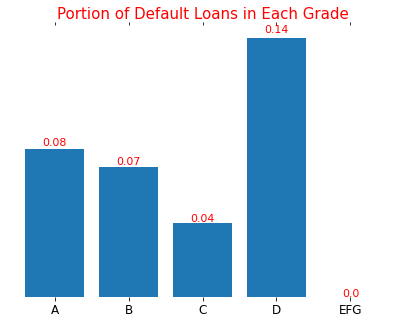

In [26]:
plot_bars(grade_loan_status[['grade', 'Charged Off']].grade\
          , grade_loan_status[['grade', 'Charged Off']]['Charged Off'], 'Portion of Default Loans in Each Grade',(7,5),0)
plt.show()

### Highest portion of default loans were in grade D loans.

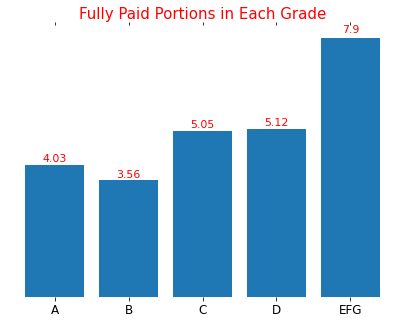

In [27]:
plot_bars(grade_loan_status[['grade', 'Fully Paid']].grade\
          , grade_loan_status[['grade', 'Fully Paid']]['Fully Paid'], 'Fully Paid Portions in Each Grade',(7,5),0)
plt.show()

----------------

### interest_rate

In [28]:
df.interest_rate.describe()

count    10000.000000
mean        12.427524
std          5.001105
min          5.310000
25%          9.430000
50%         11.980000
75%         15.050000
max         30.940000
Name: interest_rate, dtype: float64

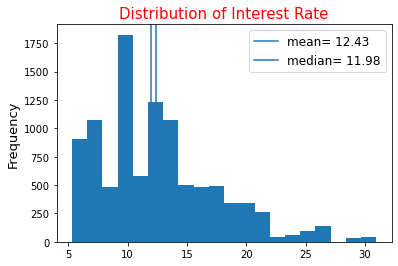

In [29]:
plot_hist(df.interest_rate, 'Distribution of Interest Rate')
plt.show()

###  Distribution of interest rate is skewed to the left. There are loans with interest rate between 20% and 31%, while 50% of loans have less than 12% interest rate.

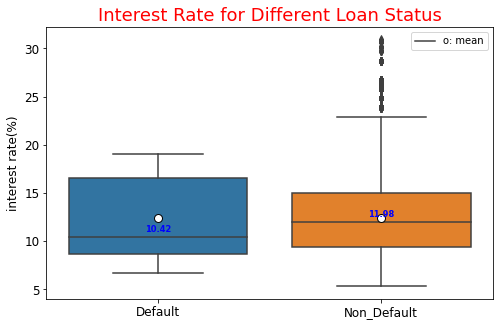

In [56]:
plt.figure(figsize=(8,5))
vertical_offset = df.interest_rate.median()* 0.05
medians = df.groupby('default')['interest_rate'].median().sort_values().values
ranks = df.groupby('default')['interest_rate'].median().sort_values().index
plot_boxplot(df.default, df.interest_rate, ranks, vertical_offset, medians
             , 'interest rate(%)','Interest Rate for Different Loan Status',0)
plt.legend(["o: mean"], bbox_to_anchor= (1,1))
plt.xticks([0,1], ['Default', 'Non_Default'])
plt.show()

### Median of interest rate of default loans were 0.66% lower than non-default loans.

-----------

### interest_rate and loan_amount

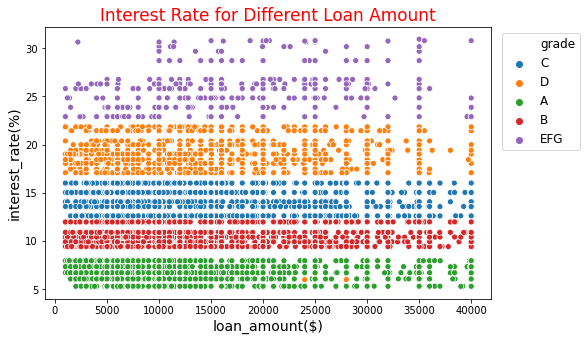

In [31]:
plt.figure(figsize= (8,5))
plot_scatter(df.loan_amount, df.interest_rate, df.grade, 'loan_amount($)', 'interest_rate(%)'\
              ,'Interest Rate for Different Loan Amount')
plt.show()

### Interest rate is dependent to the grade rathern than loan amount.

In [32]:
grade_A = df.loc[df.grade =='A','interest_rate']
grade_B = df.loc[df.grade =='B','interest_rate']
grade_C = df.loc[df.grade =='C','interest_rate']
grade_D = df.loc[df.grade =='D','interest_rate']
grade_EFG = df.loc[df.grade =='EFG','interest_rate']

gradeA_loan = df.loc[df.grade =='A','loan_amount']
gradeB_loan = df.loc[df.grade =='B','loan_amount']
gradeC_loan = df.loc[df.grade =='C','loan_amount']
gradeD_loan = df.loc[df.grade =='D','loan_amount']
gradeEFG_loan = df.loc[df.grade =='EFG','loan_amount']

'**kernel density estimation (KDE)** is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.'
https://en.wikipedia.org/wiki/Kernel_density_estimation#:~:text=In%20statistics%2C%20kernel%20density%20estimation,on%20a%20finite%20data%20sample.

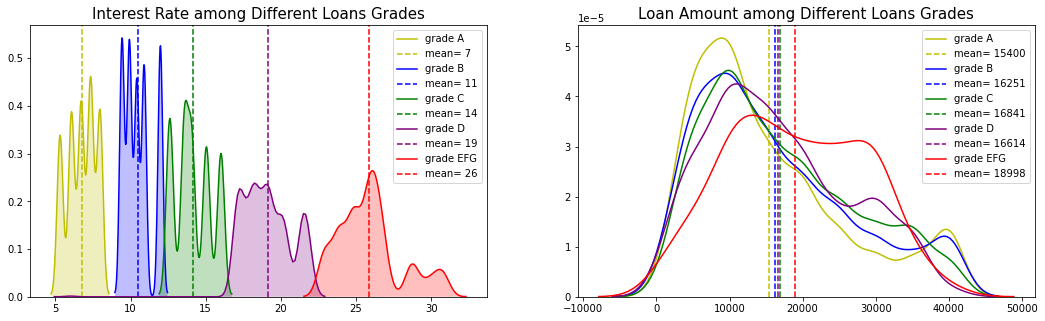

In [33]:
plt.figure(figsize=(18,5))

ax1 = plt.subplot2grid((1,2), (0, 0))
ax1 = plot_kde(grade_A, 'y', True,'grade A')
ax1 = plot_kde(grade_B,'b', True, 'grade B')
ax1 = plot_kde(grade_C,'g', True, 'grade C')
ax1 = plot_kde(grade_D,'purple', True,'grade D')
ax1 = plot_kde(grade_EFG, 'r', True, 'grade EFG')
ax1.legend(fontsize= 10)
ax1.set_title('Interest Rate among Different Loans Grades',fontsize=15)

ax2 = plt.subplot2grid((1,2), (0, 1))
ax2 = plot_kde(gradeA_loan, 'y', False,'grade A')
ax2 = plot_kde(gradeB_loan,'b',False,'grade B')
ax2 = plot_kde(gradeC_loan, 'g', False,'grade C')
ax2 = plot_kde(gradeD_loan, 'purple',False,'grade D')
ax2 = plot_kde(gradeEFG_loan,'r',False,'grade EFG')
ax2.legend(fontsize= 10)
ax2.set_title('Loan Amount among Different Loans Grades',fontsize=15)
plt.show()


### Interest rate is totally dependent to the grade of loan. Loans with low risk (grade A) had lower interest rate (mean= 7%), whereas loans with high risk (grade E, F, or G) had higher interest rate (mean= 26%).
### Average of loan amount with grade A is 15400 dollars which is less than average amount with grade B, 18998 dollars.

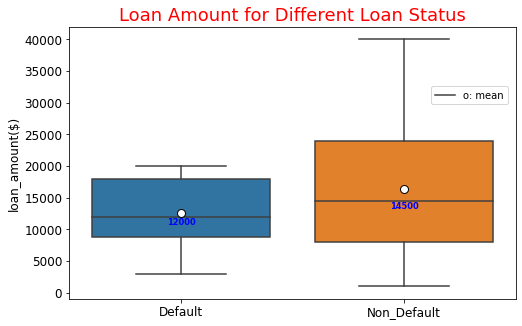

In [34]:
plt.figure(figsize=(8,5))
vertical_offset = df.loan_amount.median()* -0.09
medians = df.groupby('default')['loan_amount'].median().sort_values().values
ranks = df.groupby('default')['loan_amount'].median().sort_values().index
plot_boxplot(df.default, df.loan_amount, ranks, vertical_offset, medians
             , 'loan_amount($)','Loan Amount for Different Loan Status',0)
plt.legend(["o: mean"], bbox_to_anchor= (0.80,0.80))
plt.xticks([0,1], ['Default', 'Non_Default'])
plt.show()

### Median of loan amount of defaults was 2.5k dollars lower than non-default ones.

-------

### term
The number of months of the loan the applicant received.

In [35]:
df.term.head()

0    60
1    36
2    36
3    36
4    36
Name: term, dtype: int64

In [36]:
term = df.term.value_counts(normalize= True, dropna= False)
term

36    0.697
60    0.303
Name: term, dtype: float64

In [37]:
df.term = df.term.apply(lambda x: str(x)+'_month')
term = 100 * df.term.value_counts(normalize= True, dropna= False)
term

36_month    69.7
60_month    30.3
Name: term, dtype: float64

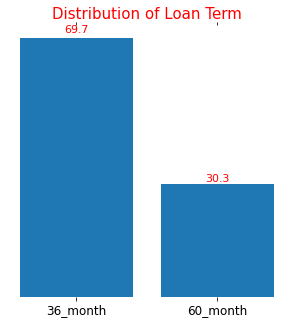

In [38]:
plot_bars(term.index, term, 'Distribution of Loan Term', (5,5),0)
plt.show()

### About 70% of loans had term of 36 month and remaining 30% had 60 month.

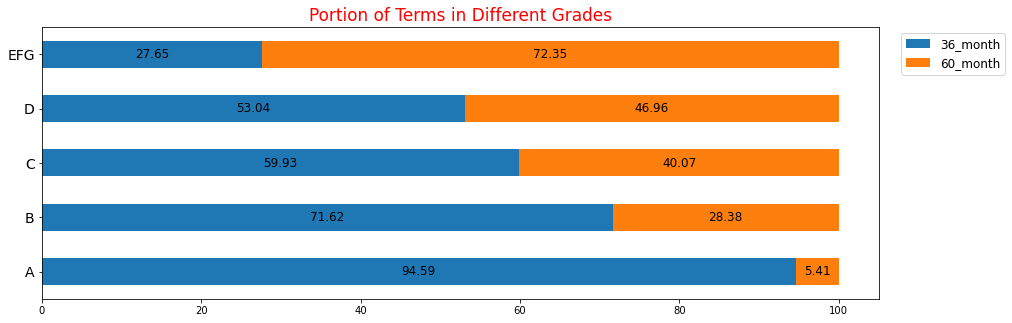

In [39]:
grade_term = pd.DataFrame(round(100* df.groupby('grade')['term'].value_counts(normalize= True, dropna= True),2))
grade_term.columns = ['pct']
grade_term.reset_index(inplace= True)
grade_term = pd.pivot_table(grade_term, index= ['grade'], columns= ['term'], values=['pct'])
grade_term.reset_index(inplace= True)
grade_term.columns= ['grade','36_month','60_month']
plot_stackedbarh(grade_term, np.arange(len(grade_term)), ['A', 'B', 'C','D','EFG']\
                 ,'Portion of Terms in Different Grades')
plt.show()

### Majority of low risk loans had term of 36 month; while majority of high risk loans had term of 60 month.

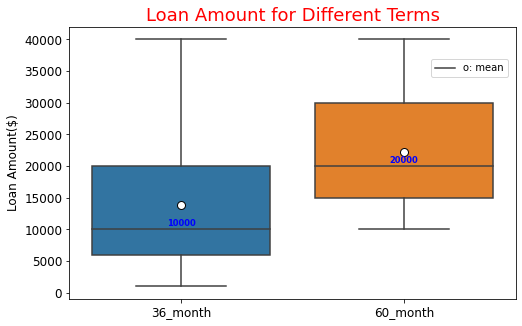

In [40]:
plt.figure(figsize=(8,5))
vertical_offset = df.loan_amount.median()* 0.04
medians = df.groupby('term')['loan_amount'].median().sort_values().values
ranks = df.groupby('term')['loan_amount'].median().sort_values().index
plot_boxplot(df.term, df.loan_amount, ranks, vertical_offset, medians
             , 'Loan Amount($)','Loan Amount for Different Terms', 0)
plt.legend(["o: mean"], bbox_to_anchor= (0.80,0.90))
plt.show()

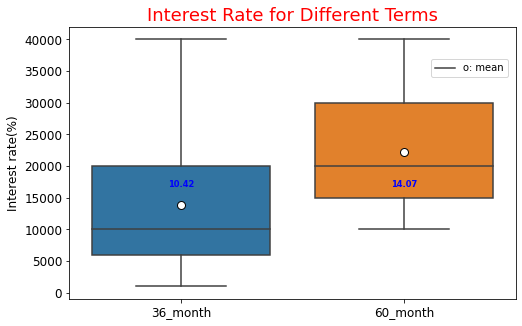

In [41]:
plt.figure(figsize=(8,5))
vertical_offset = df.loan_amount.median()* 1.15
medians = df.groupby('term')['interest_rate'].median().sort_values().values
ranks = df.groupby('term')['interest_rate'].median().sort_values().index
plot_boxplot(df.term, df.loan_amount, ranks, vertical_offset, medians
             , 'Interest rate(%)','Interest Rate for Different Terms',0)
plt.legend(["o: mean"], bbox_to_anchor= (0.80,0.90))
plt.show()

### Loan amount  and interest rate for loans with term of 60 month were higher than loans with term of 36 month. Median of loan amount for longer term had twice of 36 month loans; and median of interest rate for long term loans was 3.6% higher than shorter term.

In [42]:
default_term = pd.DataFrame(round(100 * df.groupby('default')['term'].value_counts(normalize= True, dropna= False),2))
default_term.columns = ['pct']
default_term.reset_index(inplace=True)
default_term = pd.pivot_table(default_term, index= ['default'], columns= ['term'], values= ['pct'])
default_term.columns = ['36_month', '60_month']
default_term

,36_month,60_month
default,,
0,69.69,30.31
1,85.71,14.29


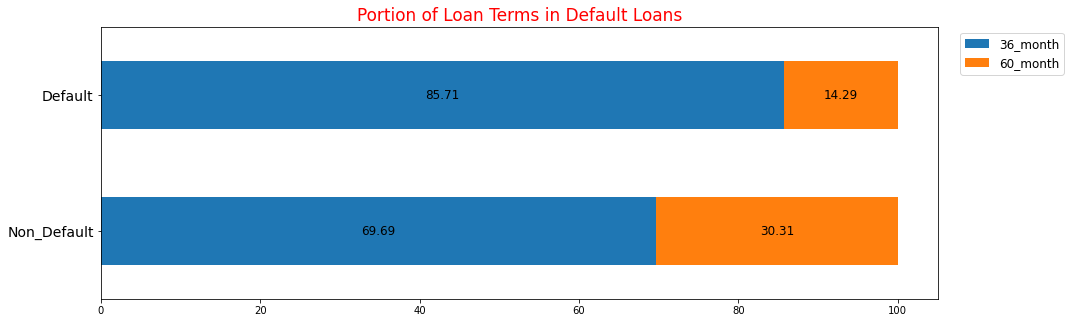

In [43]:
plot_stackedbarh(default_term, np.arange(len(default_term)) ,['Non_Default','Default']\
                 ,'Portion of Loan Terms in Default Loans')
plt.ylabel('')
plt.show()

### Percentage of 60-month loans among default loans were half of the corresponding percentage among non-default loans.

--------------

### loan purpse

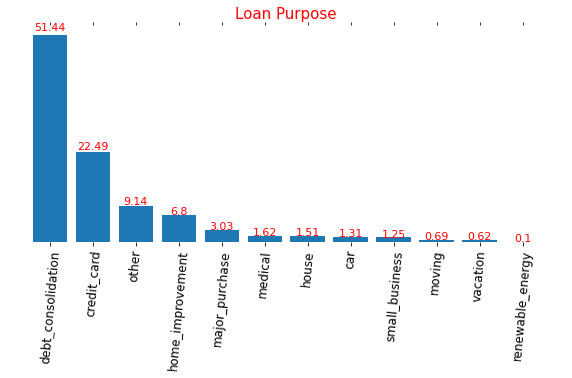

In [44]:
loan_purpose = round(100 * df.loan_purpose.value_counts(normalize= True, dropna= False), 2)
plot_bars(loan_purpose.index, loan_purpose, 'Loan Purpose', (10,4), 85)
plt.show()

###  8.3% of the loans were with the purpose for buying house and home improvent. 

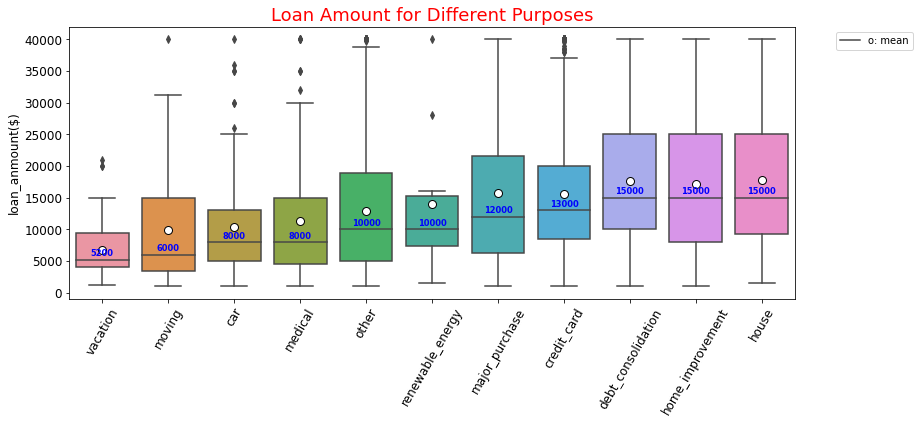

In [45]:
plt.figure(figsize=(13,5))
vertical_offset = df.loan_amount.median()* 0.04
medians = df.groupby('loan_purpose')['loan_amount'].median().sort_values().values
ranks = df.groupby('loan_purpose')['loan_amount'].median().sort_values()[:-1].index
plot_boxplot(df.loan_purpose, df.loan_amount, ranks, vertical_offset, medians
             , 'loan_anmount($)','Loan Amount for Different Purposes', 60)
plt.legend(["o: mean"], bbox_to_anchor= (1.05,1))
plt.show()

### About 60% of loans used for debt consolidation, home improvement and buying house when 50% of times their amount were 15k dollars or less.
### More than 22% of loans used to pay off the credit card with the median of 13k dollars or less.

In [46]:
grade_purpose = pd.DataFrame(round(100 * df.groupby('grade')['loan_purpose']\
                                   .value_counts(normalize= True, dropna= False), 1))
grade_purpose.columns = ['pct']
grade_purpose.reset_index(inplace=True)
grade_purpose.head()

,grade,loan_purpose,pct
0,A,debt_consolidation,44.2
1,A,credit_card,28.3
2,A,other,8.5
3,A,home_improvement,8.2
4,A,major_purchase,3.5


In [47]:
grade_purpose = pd.pivot_table(grade_purpose, index= ['grade'], columns= ['loan_purpose'], values= ['pct'])
grade_purpose= grade_purpose.reset_index()
grade_purpose.columns = ['grade','car','credit_card','debt_consolidation','home_improvement','house','major_purchase'\
                         ,'medical','moving', 'other','renewable_energy','small_business','vacation']
grade_purpose['other_purpose'] = grade_purpose['major_purchase']+ grade_purpose['medical'] + grade_purpose['moving']\
                                + grade_purpose['other'] + grade_purpose['renewable_energy'] \
                                + grade_purpose['small_business'] + grade_purpose['vacation']
grade_purpose= grade_purpose[['grade','debt_consolidation','credit_card', 'home_improvement','house','other_purpose']]
grade_purpose

,grade,debt_consolidation,credit_card,home_improvement,house,other_purpose
0,A,44.2,28.3,8.2,2.0,16.1
1,B,49.3,23.8,7.1,1.7,16.7
2,C,54.0,21.0,6.0,1.0,16.6
3,D,60.4,15.2,5.5,1.2,17.0
4,EFG,63.0,13.8,5.7,1.2,14.9


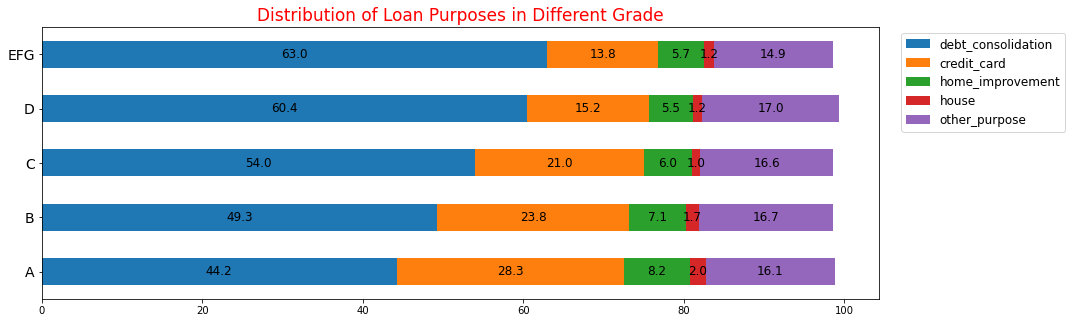

In [48]:
plot_stackedbarh(grade_purpose, np.arange(len(grade_purpose.grade)) ,['A', 'B', 'C','D','EFG']\
                 ,'Distribution of Loan Purposes in Different Grade')
plt.show()

### Higher risk loans used more often for debt consolidation, and lower risk loans commonly used for credit card.

In [49]:
intr_purpose = pd.DataFrame(round(df.groupby(['grade','loan_purpose'])['interest_rate'].median(), 1))
intr_purpose.columns = ['median']
intr_purpose.reset_index(inplace=True)
intr_purpose.head()

,grade,loan_purpose,median
0,A,car,6.7
1,A,credit_card,6.7
2,A,debt_consolidation,6.7
3,A,home_improvement,6.7
4,A,house,6.1


In [50]:
intr_purpose = pd.pivot_table(intr_purpose, index= ['grade'],columns= ['loan_purpose'], values= ['median'])
intr_purpose.columns = ['car','credit_card', 'debt_consolidation', 'small_business','home_improvement',
        'house', 'major_purchase','medical','moving',  'vacation',
        'other', 'renewable_energy']
intr_purpose

,car,credit_card,debt_consolidation,small_business,home_improvement,house,major_purchase,medical,moving,vacation,other,renewable_energy
grade,,,,,,,,,,,,
A,6.7,6.7,6.7,6.7,6.1,6.7,6.7,6.7,7.3,6.1,7.0,6.7
B,10.4,10.4,10.4,9.9,10.4,10.4,9.9,9.9,10.4,12.0,10.7,10.4
C,14.1,14.1,14.1,14.1,14.1,13.8,14.1,14.1,14.1,15.0,14.1,14.6
D,20.0,19.0,19.0,18.3,19.4,19.0,19.4,19.0,19.0,19.4,19.7,18.4
EFG,25.8,24.8,25.8,25.8,24.8,25.8,25.8,24.8,24.8,26.8,25.8,23.9


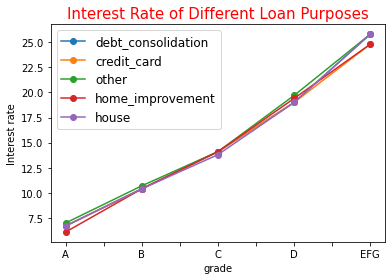

In [51]:
plot_line(intr_purpose[['debt_consolidation', 'credit_card','other','home_improvement','house']]\
          , 'Interest rate', 'Interest Rate of Different Loan Purposes')
plt.show()

### Interest rate was highly dependent to loan grade rather than its purpose.

In [52]:
default_purpose = pd.DataFrame(round(100 * df.groupby('default')['loan_purpose'].value_counts(normalize= True, dropna= False),2))
default_purpose.columns = ['pct']
default_purpose.reset_index(inplace=True)
default_purpose = pd.pivot_table(default_purpose, index= ['default'], columns= ['loan_purpose'], values= ['pct'])
default_purpose.columns = ['car','credit_card', 'debt_consolidation', 'home_improvement','house', 'major_purchase'\
                           , 'medical','moving', 'other', 'renewable_energy', 'small_business', 'vacation']
default_purpose.fillna(0, inplace= True)
default_purpose


,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
default,,,,,,,,,,,,
0,1.31,22.50,51.46,6.78,1.50,3.03,1.62,0.69,9.14,0.1,1.25,0.62
1,0.00,14.29,28.57,28.57,14.29,0.00,0.00,0.00,14.29,0.0,0.00,0.00


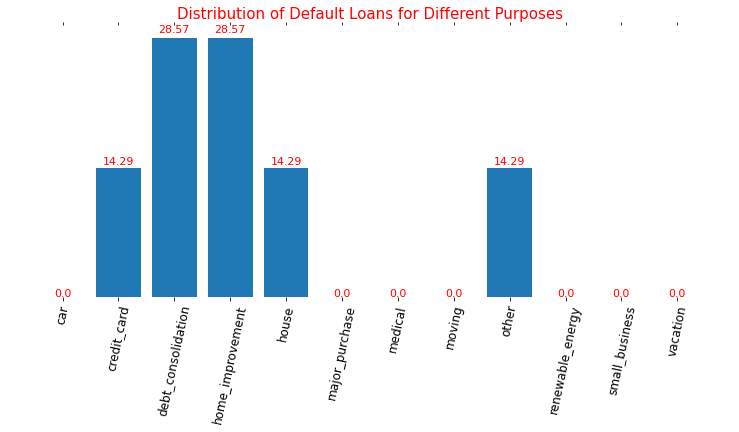

In [54]:
plot_bars(default_purpose.loc[1,:].index, default_purpose.loc[1,:]\
          , 'Distribution of Default Loans for Different Purposes',(13,5),78)
plt.show()

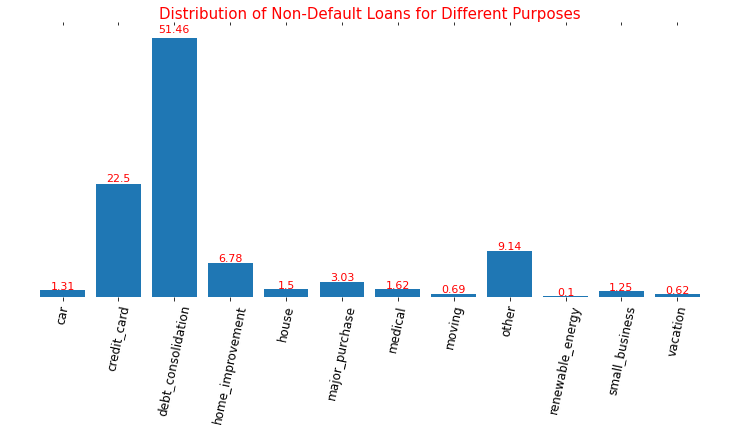

In [53]:
plot_bars(default_purpose.loc[0,:].index, default_purpose.loc[0,:]\
          ,'Distribution of Non-Default Loans for Different Purposes',(13,5),78)
plt.show()

### Default loans got more for home improvement and house than non-default loans. And non-default loans received more for credit card pay-off and debt consolidation.

-----------------

### installment

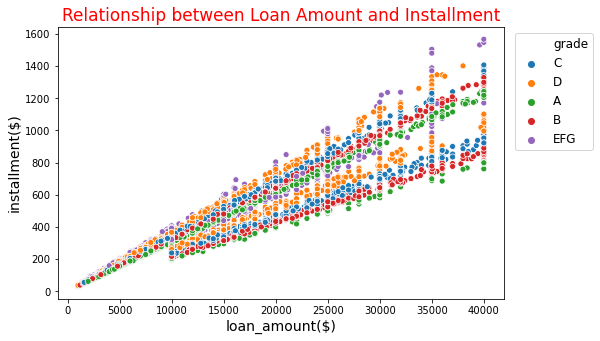

In [55]:
plt.figure(figsize=(8,5))
plot_scatter(df.loan_amount, df.installment, df.grade, 'loan_amount($)', 'installment($)'\
             , 'Relationship between Loan Amount and Installment')
plt.show()

### Installment is positively related to the loan amount, and it seems to be independent from grade.

------------------------

### emp_length
Number of years in the job, rounded down. If longer than 10 years, then this is represented by the value 10.

In [60]:
emp_length = pd.DataFrame(round(100 * df.emp_length.value_counts(normalize= True, dropna= False),2)).reset_index()
emp_length.columns= ['Employment_length', 'Percentage']

emp_length.head()

,Employment_length,Percentage
0,10.0,33.32
1,2.0,9.67
2,3.0,8.62
3,NaN,8.17
4,0.0,6.90


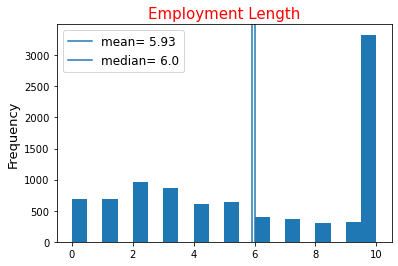

In [61]:
plot_hist(df.emp_length, 'Employment Length')
plt.show()

In [62]:
df.emp_length.fillna(6, inplace= True)

In [63]:
emp_length = pd.DataFrame(round(100 * df.emp_length.value_counts(normalize= True, dropna= False),2)).reset_index()
emp_length.columns= ['Employment_length', 'Percentage']
emp_length.sort_values(by='Employment_length', inplace= True)
emp_length.head()


,Employment_length,Percentage
4,0.0,6.90
5,1.0,6.85
2,2.0,9.67
3,3.0,8.62
7,4.0,6.11


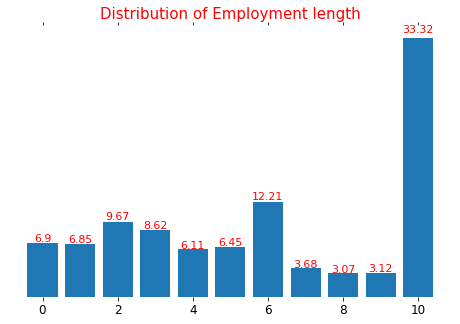

In [64]:
plot_bars(emp_length.Employment_length, emp_length.Percentage, 'Distribution of Employment length',(8,5),0)
plt.show()

In [65]:
df['original_emp_length'] = df.emp_length

In [66]:
grade_emp_length = pd.DataFrame(100*round(df.groupby(['grade'])['emp_length'].value_counts(normalize=True) ,2))

grade_emp_length.columns = ['pct']
grade_emp_length = grade_emp_length.reset_index()
grade_emp_length.emp_length = grade_emp_length.emp_length.astype(str)
grade_emp_length.emp_length.replace({'0.0':'0-1yr', '1.0':'1-2yr', '2.0':'2-3yr', '3.0':'3-4yr', '4.0':'4-5yr'\
                                    , '5.0':'5-6yr','6.0':'6-7yr', '7.0':'7-8yr', '8.0':'8-9yr', '9.0':'9-10yr'\
                                   ,'10.0':'10yr_or_more'},inplace= True)
grade_emp_length.head()


,grade,emp_length,pct
0,A,10yr_or_more,35.0
1,A,6-7yr,11.0
2,A,2-3yr,9.0
3,A,3-4yr,9.0
4,A,0-1yr,7.0


In [67]:
grade_emp_length = pd.pivot_table(grade_emp_length, index= ['grade'], columns= ['emp_length'], values= ['pct'])
grade_emp_length= grade_emp_length.reset_index()
grade_emp_length.fillna(0, inplace= True)

grade_emp_length.columns = ['grade', '0-1yr', '1-2yr','10yr_or_more','2-3yr','3-4yr','4-5yr', '5-6yr','6-7yr','7-8yr'\
                            , '8-9yr', '9-10yr']
grade_emp_length = grade_emp_length[['grade', '0-1yr', '1-2yr','2-3yr','3-4yr','4-5yr', '5-6yr','6-7yr','7-8yr'\
                            , '8-9yr', '9-10yr','10yr_or_more']]

grade_emp_length

,grade,0-1yr,1-2yr,2-3yr,3-4yr,4-5yr,5-6yr,6-7yr,7-8yr,8-9yr,9-10yr,10yr_or_more
0,A,7.0,6.0,9.0,9.0,7.0,6.0,11.0,4.0,3.0,3.0,35.0
1,B,6.0,7.0,10.0,8.0,6.0,7.0,12.0,4.0,3.0,3.0,34.0
2,C,8.0,8.0,9.0,9.0,6.0,6.0,13.0,4.0,2.0,3.0,31.0
3,D,7.0,7.0,10.0,8.0,6.0,6.0,13.0,4.0,4.0,3.0,32.0
4,EFG,7.0,8.0,11.0,9.0,5.0,6.0,11.0,1.0,4.0,4.0,34.0


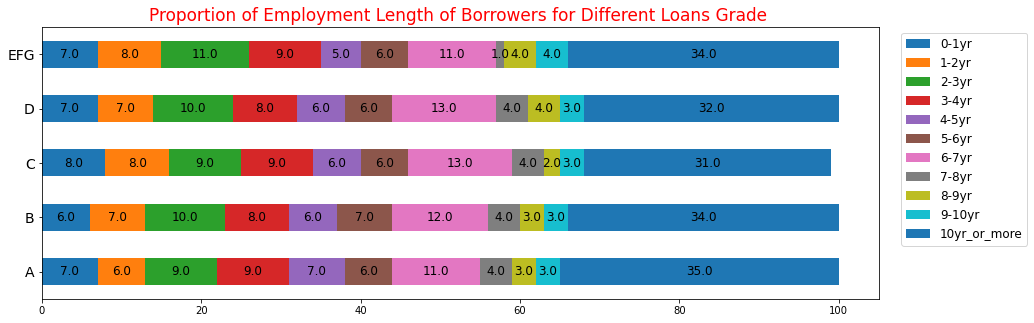

In [68]:
plot_stackedbarh(grade_emp_length, np.arange(len(grade_emp_length)), ['A', 'B', 'C','D','EFG']\
                 ,'Proportion of Employment Length of Borrowers for Different Loans Grade ')
plt.show()

### More than 80% of borrowers had grade A, B, C, and 33% of borrowers were with employment length of 10 years or more. Majority of the borrowers with 10 or more years of experience received the loan with grade A, B or C. 
### Borrowers with 10 or more years of experience have had mor money to spend and used more credit card, which might impact credit card score positively. But Borrowers with 1 to 2 years of experience got fewer low risk loans.

In [69]:
df.loc[df.default == 1 , 'original_emp_length']

387      5.0
671      9.0
1344     1.0
3901     4.0
3957    10.0
6167     7.0
8874     6.0
Name: original_emp_length, dtype: float64

In [70]:
default_emp_len = pd.DataFrame(round(df.groupby('default')['original_emp_length']\
                                     .value_counts(normalize= True, dropna= False),2))
default_emp_len.columns = ['pct']
default_emp_len.reset_index(inplace=True)
default_emp_len = pd.pivot_table(default_emp_len, index= ['default'], columns= ['original_emp_length'], values= ['pct'])
#default_purpose.columns = 
default_emp_len.fillna(0, inplace= True)
default_emp_len.columns = list(range(11))
default_emp_len

,0,1,2,3,4,5,6,7,8,9,10
default,,,,,,,,,,,
0,0.07,0.07,0.1,0.09,0.06,0.06,0.12,0.04,0.03,0.03,0.33
1,0.00,0.14,0.0,0.00,0.14,0.14,0.14,0.14,0.00,0.14,0.14


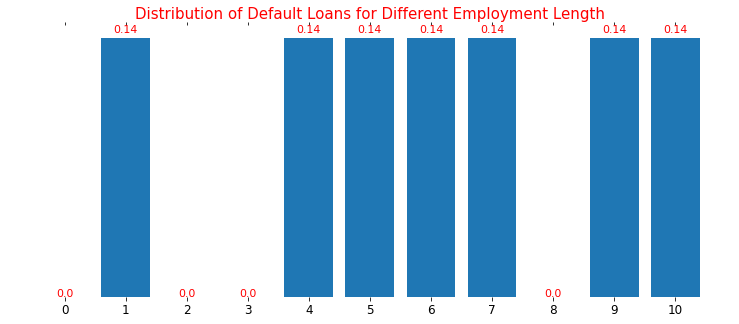

In [71]:
plot_bars(default_emp_len.loc[1,:].index, default_emp_len.loc[1,:]\
          , 'Distribution of Default Loans for Different Employment Length',(13,5),0)
plt.xticks(list(range(11)))
plt.show()

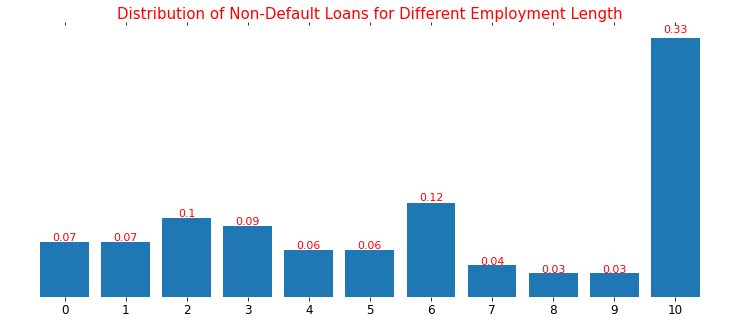

In [72]:
plot_bars(default_emp_len.loc[0,:].index, default_emp_len.loc[0,:]\
          , 'Distribution of Non-Default Loans for Different Employment Length',(13,5),0)
plt.xticks(list(range(11)))
plt.show()

### There weren't any default loans received by borrowers with less than 1, 1-2 ,2-3 and 8-9 years of employment.

------------

### initial_listing_status
Whether the lender provided the entire loan or if the loan is across multiple lenders.

In [73]:
df.initial_listing_status.head()

0         whole
1         whole
2    fractional
3         whole
4         whole
Name: initial_listing_status, dtype: object

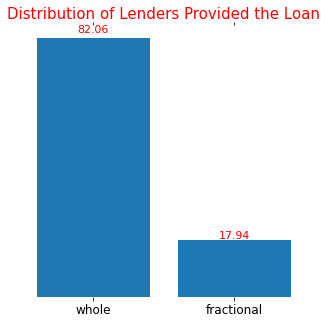

In [74]:
initial_listing_status = round(100 *df.initial_listing_status.value_counts(normalize= True, dropna= False),2)
plot_bars(initial_listing_status.index, initial_listing_status, 'Distribution of Lenders Provided the Loan',(5,5),0)
plt.show()

In [75]:
default_listing_status = pd.DataFrame(
    round(100 *df.groupby('default')['initial_listing_status'].value_counts(normalize= True, dropna= False),2))
default_listing_status.columns= ['pct']
default_listing_status.reset_index(inplace= True)
default_listing_status = pd.pivot_table(default_listing_status, index= ['default'], columns= ['initial_listing_status']\
                                        , values= ['pct'])
default_listing_status.columns = [ 'fractional', 'whole']
default_listing_status.fillna(0, inplace= True)
default_listing_status

,fractional,whole
default,,
0,17.92,82.08
1,42.86,57.14


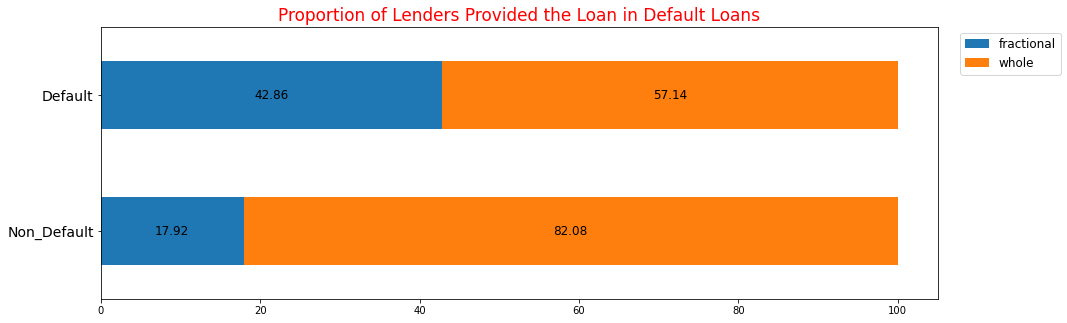

In [72]:
plot_stackedbarh(default_listing_status, np.arange(len(default_listing_status)), ['Non_Default','Default']\
                 ,'Proportion of Lenders Provided the Loan in Default Loans')
plt.ylabel('')
plt.show()

### Higher percentage of fractional loan providers faced with default loans

--------------

### disbursement_method

In [77]:
disbursement_method = round(100 * df.disbursement_method.value_counts(normalize= True, dropna= False),1)
disbursement_method 

Cash         92.8
DirectPay     7.2
Name: disbursement_method, dtype: float64

In [78]:
df.loc[df.loan_status == 'Charged Off', 'disbursement_method']

387     Cash
671     Cash
1344    Cash
3901    Cash
3957    Cash
6167    Cash
8874    Cash
Name: disbursement_method, dtype: object

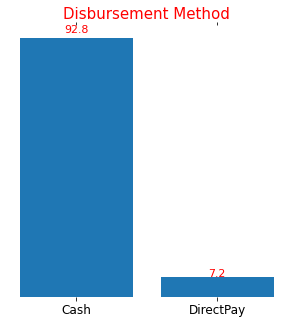

In [79]:
plot_bars(disbursement_method.index, disbursement_method, 'Disbursement Method',(5,5),0)
plt.show()

In [80]:
default_dis = pd.DataFrame(
    round(100 *df.groupby('default')['disbursement_method'].value_counts(normalize= True, dropna= False),2))
default_dis.columns= ['pct']
default_dis.reset_index(inplace= True)
default_dis = pd.pivot_table(default_dis, index= ['default'], columns= ['disbursement_method'], values= ['pct'])
default_dis.columns = ['Cash', 'DirectPay']
default_dis.fillna(0, inplace= True)
default_dis

,Cash,DirectPay
default,,
0,92.83,7.17
1,100.00,0.00


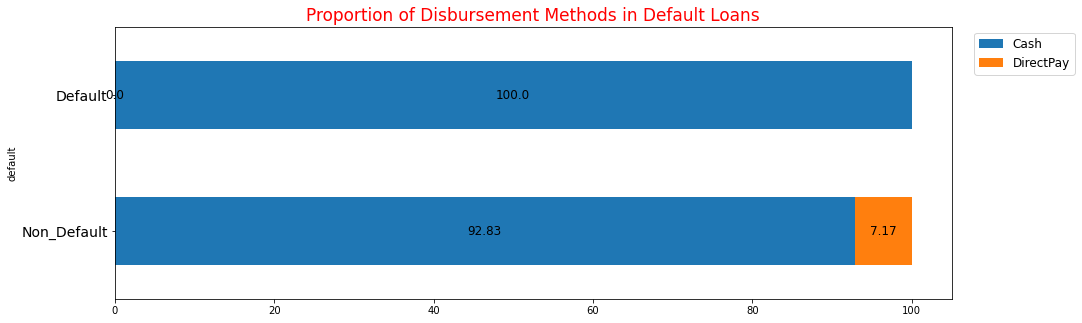

In [81]:
plot_stackedbarh(default_dis, np.arange(len(default_dis)), ['Non_Default','Default']\
                 ,'Proportion of Disbursement Methods in Default Loans')
plt.show()

### All default loans were disbursed through cash.

---

### balance
Current balance of the loan.

In [82]:
df.balance.head()

0    27015.86
1     4651.37
2     1824.63
3    18853.26
4    21430.15
Name: balance, dtype: float64

In [83]:
df.balance.isna().sum()

0

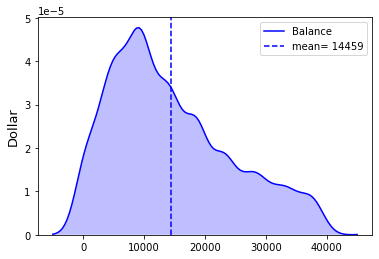

In [84]:
ax = plot_kde(df.balance,'blue',True,'Balance')
ax.legend()
#ax.set_title('Distribution of Annual Income', color= 'red', fontsize=15)
ax.set_ylabel('Dollar',fontsize=13)
plt.show()

In [85]:
(df.balance > df.balance.mean() + 3* df.balance.std()).sum()

0

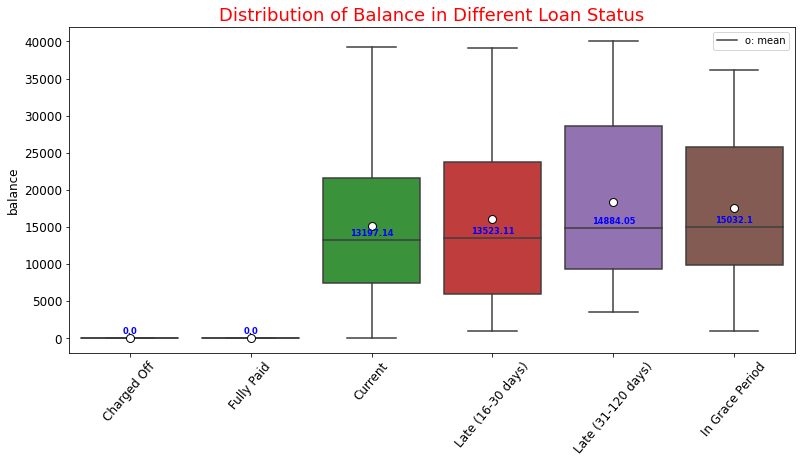

In [87]:
plt.figure(figsize=(13,6))
df.groupby('loan_status')['balance']
vertical_offset = df.balance.median()* 0.05
medians = df.groupby('loan_status')['balance'].median().sort_values().values
ranks = df.groupby('loan_status')['balance'].median().sort_values().index
plot_boxplot(df.loan_status, df.balance, ranks, vertical_offset, medians, 'balance'\
             ,'Distribution of Balance in Different Loan Status',50)
plt.legend(["o: mean"], bbox_to_anchor= (0.88,1))
plt.show()

### Balance of fully paid and default loans were zero, which makes sense.

--------------

### paid_principal
The difference between the original loan amount and the current balance on the loan.

In [88]:
df.paid_principal.head()

0     984.14
1     348.63
2     175.37
3    2746.74
4    1569.85
Name: paid_principal, dtype: float64

In [89]:
df.paid_principal.isna().sum()

0

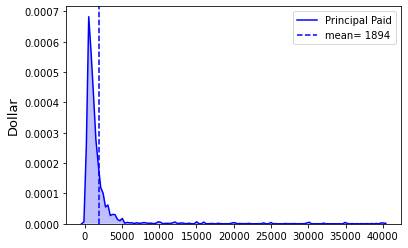

In [90]:
paid_principal = df.paid_principal
ax =plot_kde(paid_principal,'blue',True,'Principal Paid')
ax.legend()
#ax.set_title('Distribution of Annual Income', color= 'red', fontsize=15)
ax.set_ylabel('Dollar',fontsize=13)
plt.show()

In [91]:
lower_bound = df.paid_principal.mean() - 3* df.paid_principal.std()
upper_bound = df.paid_principal.mean() + 3* df.paid_principal.std()
(lower_bound , upper_bound)

(-9758.773058837396, 13547.669990837396)

In [92]:
(df.paid_principal > upper_bound).sum()/len(df)

0.0218

In [93]:
df.loc[df.paid_principal > upper_bound, 'paid_principal']= upper_bound

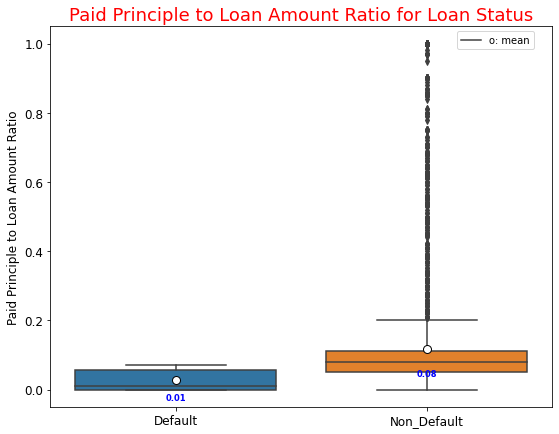

In [94]:
df['paidPrinciple_to_loanAmnt_ratio'] = round( df.paid_principal / df.loan_amount,2)

plt.figure(figsize=(9,7))
vertical_offset = df['paidPrinciple_to_loanAmnt_ratio'].median()* -0.5
medians = df.groupby('default')['paidPrinciple_to_loanAmnt_ratio'].median().sort_values().values
ranks = df.groupby('default')['paidPrinciple_to_loanAmnt_ratio'].median().sort_values().index
plot_boxplot(df.default, df['paidPrinciple_to_loanAmnt_ratio'], ranks, vertical_offset, medians
             , 'Paid Principle to Loan Amount Ratio','Paid Principle to Loan Amount Ratio for Loan Status',0)
plt.legend(["o: mean"], bbox_to_anchor= (0.80,1))
plt.xticks([0,1], ['Default', 'Non_Default'])
plt.show()

In [95]:
df.loc[df.default==1,'paidPrinciple_to_loanAmnt_ratio'].max() 

0.07

### Default loans were not principal paid more than 0.07% of loan amount.

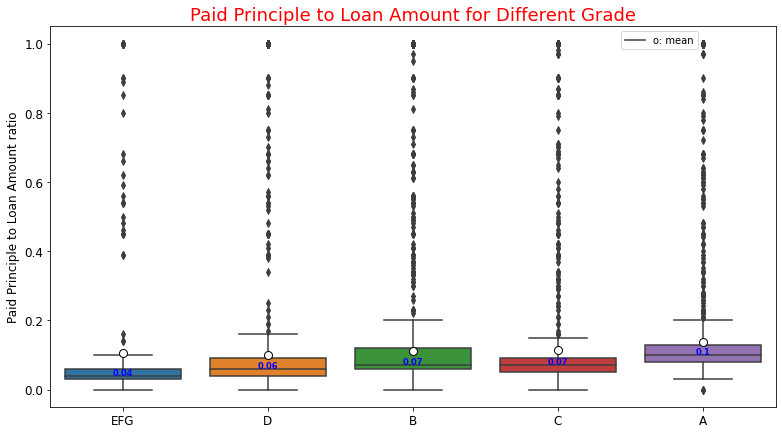

In [96]:
df['paidPrinciple_to_loanAmnt_ratio'] = round( df.paid_principal / df.loan_amount,2)

plt.figure(figsize=(13,7))
vertical_offset = df['paidPrinciple_to_loanAmnt_ratio'].median()* 0.03

medians = df.groupby('grade')['paidPrinciple_to_loanAmnt_ratio'].median().sort_values().values
ranks = df.groupby('grade')['paidPrinciple_to_loanAmnt_ratio'].median().sort_values().index
plot_boxplot(df.grade, df['paidPrinciple_to_loanAmnt_ratio'], ranks, vertical_offset, medians
             , 'Paid Principle to Loan Amount ratio','Paid Principle to Loan Amount for Different Grade',0)
plt.legend(["o: mean"], bbox_to_anchor= (0.90,1))
plt.show()

------

### State

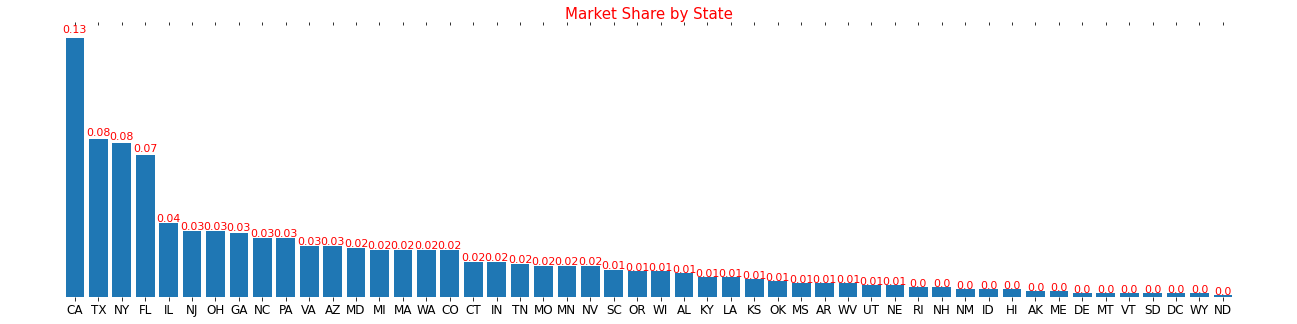

In [97]:
state= pd.DataFrame(round(df.state.value_counts(normalize= True, dropna= False),3)).reset_index()
state.columns= ['State', 'Percentage']
plot_bars(state.State, state.Percentage, 'Market Share by State',(23,5),0)
plt.show()

### I calculated market share based on the number of the loans in each state. Only CA, TX, NY and FL had the market share higher than 5%. There were 10 states with market share higher than 3%. I considered those states as top markets.

### Add a categorical column which will group state based on their frequency. Those with less than 1% grouped as 'state_3'; states with frequency between 1% to 10% grouped as 'state_2', other wise they are in 'state_1'.

In [98]:
state_tier4 = state.loc[state.Percentage <= 0.01 , 'State'].tolist()
state_tier3 = state.loc[(state.Percentage > 0.01) & (state.Percentage <= 0.025) , 'State'].tolist()
state_tier2 = state.loc[(state.Percentage > 0.025) & (state.Percentage <= 0.05) , 'State'].tolist()
state_tier1 = state.loc[state.Percentage > 0.05 , 'State'].tolist()

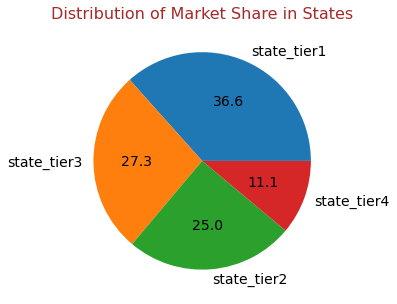

In [99]:
#df['state_cat'] = ['state_3' if s in state_3 else 'state_2' if s in state_2 else 'state_1' for s in df.state]
df['state_cat'] = ['state_tier4' if s in state_tier4 else 'state_tier3' if s in state_tier3 else\
                   'state_tier2' if s in state_tier2 else 'state_tier1' for s in df.state]
state_cat = df['state_cat'].value_counts(dropna= False)
plot_pie(state_cat, state_cat.index, 'Distribution of Market Share in States')
plt.show()

#### * In 77% of states, company had between 1% and 10% borrowers.
#### * And in 13% of states, there were 10% or more borrowers.

In [100]:
grade_state = pd.DataFrame(100*round(df.groupby(['grade'])['state_cat'].value_counts(normalize= True) ,2))

grade_state.columns = ['pct']
grade_state.reset_index(inplace=True)
grade_state.head()

,grade,state_cat,pct
0,A,state_tier1,37.0
1,A,state_tier3,27.0
2,A,state_tier2,25.0
3,A,state_tier4,11.0
4,B,state_tier1,36.0


In [101]:
grade_state = pd.pivot_table(grade_state, index= ['grade'], columns= ['state_cat'], values= ['pct'])
grade_state.reset_index(inplace=True)
grade_state.columns= ['grade', 'state_tier1','state_tier2','state_tier3', 'state_tier4']
#grade_state = grade_state[['grade', 'state_tier1','state_tier3','state_tier2', 'state_tier4']]
grade_state

,grade,state_tier1,state_tier2,state_tier3,state_tier4
0,A,37.0,25.0,27.0,11.0
1,B,36.0,26.0,27.0,11.0
2,C,37.0,26.0,27.0,11.0
3,D,37.0,23.0,27.0,12.0
4,EFG,37.0,21.0,32.0,10.0


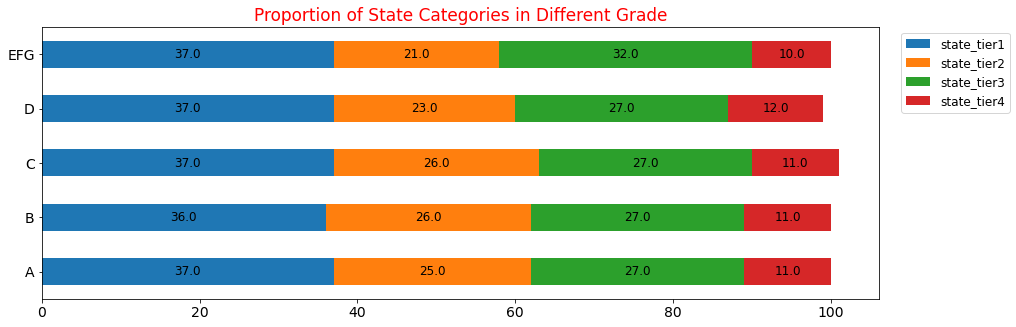

In [102]:
plot_stackedbarh(grade_state, np.arange(len(grade_state)), ['A', 'B', 'C','D','EFG']\
                 ,'Proportion of State Categories in Different Grade')
plt.show()

### Company had market share between 1% and 10% for loans with different grades in 77% of states.
### Distributions of loan grades are similar among different state category. 

In [103]:
state = pd.DataFrame(round(df.state.value_counts(normalize= True, dropna= False),3).head(10)).reset_index()
state.columns= ['State', 'Percentage']
state.head()

,State,Percentage
0,CA,0.133
1,TX,0.081
2,NY,0.079
3,FL,0.073
4,IL,0.038


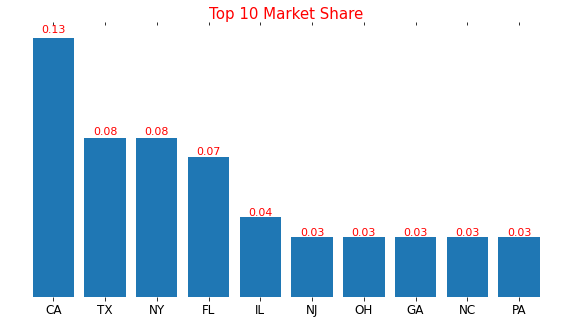

In [104]:
top_state = pd.DataFrame(round(df.state.value_counts(normalize= True, dropna= False),2).head(10)).reset_index()
top_state.columns = ['state', 'mkt_share']
plot_bars(top_state.state,top_state.mkt_share ,'Top 10 Market Share',(10,5),0)
plt.show()

In [105]:
top_states = pd.DataFrame(top_state.state)
top_states 

,state
0,CA
1,TX
2,NY
3,FL
4,IL
5,NJ
6,OH
7,GA
8,NC
9,PA


In [106]:
default_state = pd.DataFrame(round(100 * df.groupby('default')['state'].value_counts(normalize= True, dropna= False), 2))
default_state.columns= ['pct']
default_state.reset_index(inplace= True)
default_state.loc[default_state.default == 1, :]

,default,state,pct
50,1,CA,14.29
51,1,FL,14.29
52,1,MD,14.29
53,1,MI,14.29
54,1,NV,14.29
55,1,TN,14.29
56,1,TX,14.29


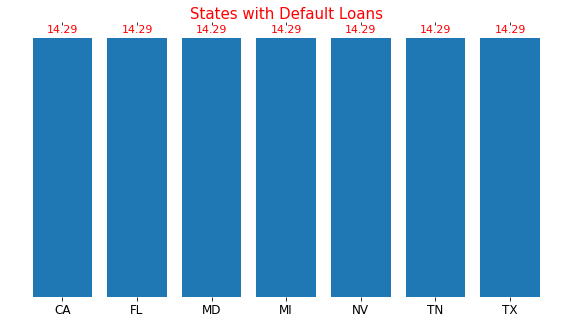

In [107]:
default_state = default_state.loc[default_state.default == 1, :]
plot_bars(default_state.state, default_state.pct\
          , 'States with Default Loans',(10,5),0)
plt.show()

### Default loans were only in CA, FL, TX, MD, MI, NV and TN.

In [108]:
default_top_states = pd.merge(top_states, default_state, on='state',how='left')
default_top_states.head()

,state,default,pct
0,CA,1.0,14.29
1,TX,1.0,14.29
2,NY,NaN,NaN
3,FL,1.0,14.29
4,IL,NaN,NaN


In [109]:
default_top_states = pd.pivot_table(default_top_states, index= ['default'], columns= ['state'], values= ['pct'])
default_top_states.fillna(0, inplace= True)
default_top_states 

pct              
state       CA     FL     TX
default                     
1.0      14.29  14.29  14.29

### From top 10 states, only CA, FL and TX had default loans.

In [110]:
grade_states = pd.DataFrame(round(100 * df.groupby('grade')['state'].value_counts(normalize= True),2))
grade_states.columns = ['pct']
grade_states.reset_index(inplace= True)
grade_states.head()

,grade,state,pct
0,A,CA,14.11
1,A,TX,8.30
2,A,NY,7.69
3,A,FL,6.47
4,A,IL,4.15


In [111]:
grade_states = pd.merge(top_state, grade_states, on= 'state', how= 'inner')
grade_states = grade_states.drop('mkt_share', axis= 1)
#grade_states = grade_states.set_index('grade')
grade_states.head()

,state,grade,pct
0,CA,A,14.11
1,CA,B,12.74
2,CA,C,13.53
3,CA,D,12.59
4,CA,EFG,13.58


In [112]:
grade_states = pd.pivot_table(grade_states, index= ['grade'], columns= ['state'], values= ['pct'])
grade_states = grade_states.fillna(0)
grade_states.reset_index(inplace= True)
grade_states.columns = ['grade','CA', 'FL', 'GA', 'IL', 'NC', 'NJ','NY', 'OH', 'PA', 'TX'] 
grade_states = grade_states[['grade','CA', 'TX', 'NY', 'FL', 'IL', 'OH', 'NJ', 'GA', 'NC', 'PA']]

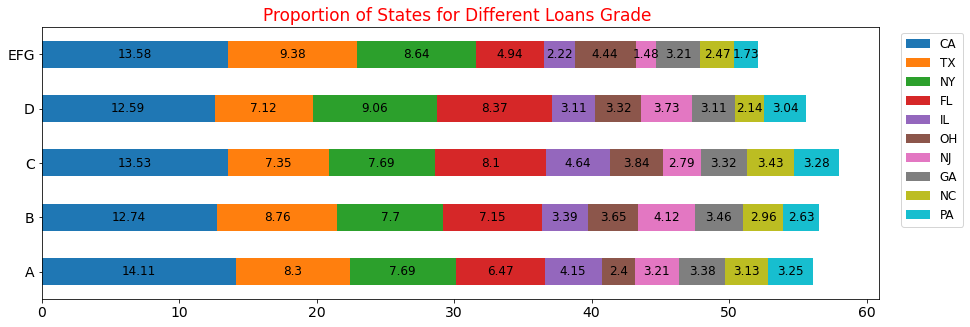

In [113]:
plot_stackedbarh(grade_states, np.arange(5), ['A', 'B', 'C','D','EFG']\
                 ,'Proportion of States for Different Loans Grade ')
plt.show()

### Among the top 10 markets, CA had highest portion of grade A and grade EFG. NY had slightly higher portions of grade D and grade EFG than other grades.

-------------------

### state and annual income

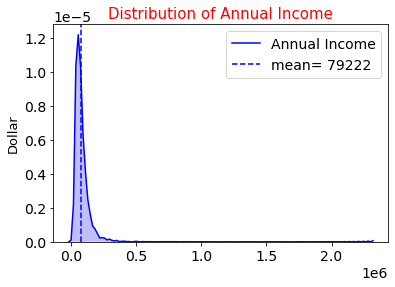

In [114]:
annual_income = df.annual_income
ax = plot_kde(annual_income,'blue',True,'Annual Income')
ax.legend()
ax.set_title('Distribution of Annual Income', color= 'red', fontsize=15)
ax.set_ylabel('Dollar',fontsize=13)
plt.show()

In [115]:
df.annual_income.describe()

count    1.000000e+04
mean     7.922215e+04
std      6.473429e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      2.300000e+06
Name: annual_income, dtype: float64

'**Winsorizing or winsorization** is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.' 

https://en.wikipedia.org/wiki/Winsorizing

In [116]:
#Find Confidence interval
CI0 = df.annual_income.mean() - 3* df.annual_income.std()
CI1 = df.annual_income.mean() + 3* df.annual_income.std()
(CI0, CI1)

(-114980.72306329208, 273425.01988729206)

In [117]:
#what percentage higher than upper limit of CI
(df.annual_income > CI1).sum()/len(df)

0.0135

### Mean and medium of annual income were 79.2k and 65k dollars respectively. 
### Only 1.35% of borrowers had annual income higher than Mean+3*std, those annual income are outliers and replaced by value of mean+3std. 

In [118]:
df.loc[df.annual_income > CI1, 'annual_income'] = CI1

In [119]:
(df.annual_income < CI0).sum() 

0

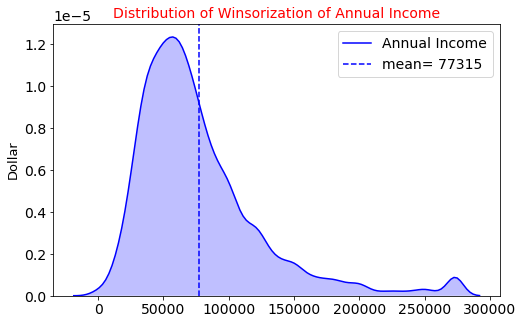

In [120]:
plt.figure(figsize=(8,5))
annual_income = df.annual_income
ax = plot_kde(annual_income,'blue',True,'Annual Income')
ax.legend()
ax.set_title('Distribution of Winsorization of Annual Income', color= 'red', fontsize=14)
ax.set_ylabel('Dollar',fontsize=13)
plt.show()

In [121]:
state_annual_income = pd.DataFrame(round(df.groupby('state')['annual_income'].mean(),2))
state_annual_income.columns= ['mean_annual_income']
state_annual_income.reset_index(inplace= True)
state_annual_income.head()

,state,mean_annual_income
0,AK,77619.18
1,AL,69623.17
2,AR,67957.79
3,AZ,73207.80
4,CA,86017.24


In [122]:
state_income = df[['state', 'annual_income']]
lst_top_state = pd.DataFrame(top_states.state)

top_state_income = pd.merge(lst_top_state,  state_income, on= 'state', how='inner')
top_state_income.set_index('state',inplace= True)
top_state_income.head()

,annual_income
state,
CA,35000.0
CA,83000.0
CA,106000.0
CA,140000.0
CA,53592.0


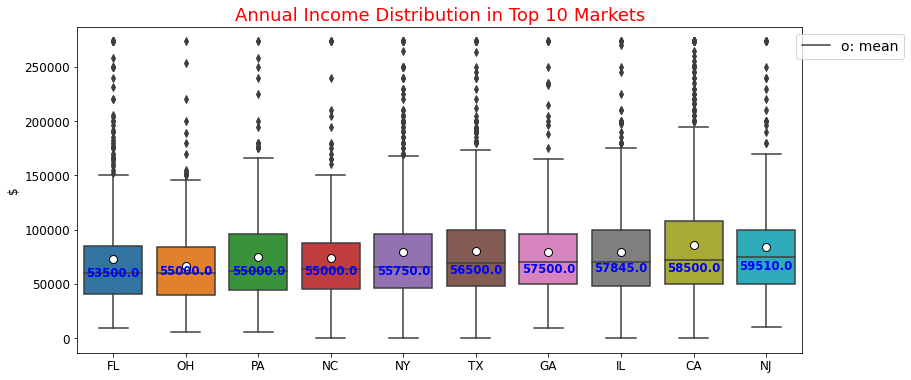

In [123]:
plt.figure(figsize=(13,6))
vertical_offset = state_income.annual_income.median()* 0.05
ranks = top_state_income.groupby('state')['annual_income'].median().sort_values(ascending= True).index
medians = round(state_income.groupby('state')['annual_income'].median()).sort_values().values
plot_boxplot(top_state_income.index, top_state_income.annual_income, ranks, vertical_offset, medians,'$'
             , 'Annual Income Distribution in Top 10 Markets',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.15,1))
plt.show()

### Median of annual income in CA was at least 2k dollars higher than TX, NY and FL. Its mean was also higher than mean in other those states.

--------------------

### homeownership  

In [124]:
homeownership = pd.DataFrame(round(100* df.homeownership.value_counts(normalize= True, dropna= False),2)).reset_index()
homeownership.columns = ['ownership','pct']
homeownership

,ownership,pct
0,MORTGAGE,47.89
1,RENT,38.58
2,OWN,13.53


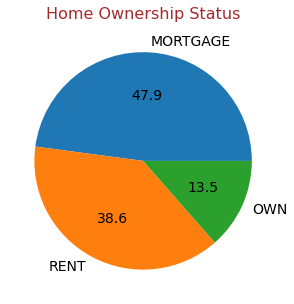

In [125]:
plot_pie(homeownership.pct, homeownership.ownership, 'Home Ownership Status')
plt.show()

### only 13% of loan receivers owned their home.

In [126]:
grade_homeownership = pd.DataFrame(round(100 * df.groupby(['grade'])['homeownership'].value_counts(normalize= True),1)) 
grade_homeownership.columns = ['pct']
grade_homeownership.reset_index(inplace= True)
grade_homeownership.head()

,grade,homeownership,pct
0,A,MORTGAGE,52.3
1,A,RENT,33.6
2,A,OWN,14.1
3,B,MORTGAGE,49.4
4,B,RENT,37.0


In [127]:
grade_homeownership = pd.pivot_table(grade_homeownership, index= ['grade'], columns= ['homeownership'], values= ['pct'])
grade_homeownership.columns = ['MORTGAGE', 'OWN', 'RENT']
grade_homeownership.reset_index(inplace= True)
grade_homeownership = grade_homeownership[['MORTGAGE','RENT','OWN']]
grade_homeownership 

,MORTGAGE,RENT,OWN
0,52.3,33.6,14.1
1,49.4,37.0,13.6
2,46.5,40.9,12.6
3,40.6,44.8,14.6
4,45.4,43.2,11.4


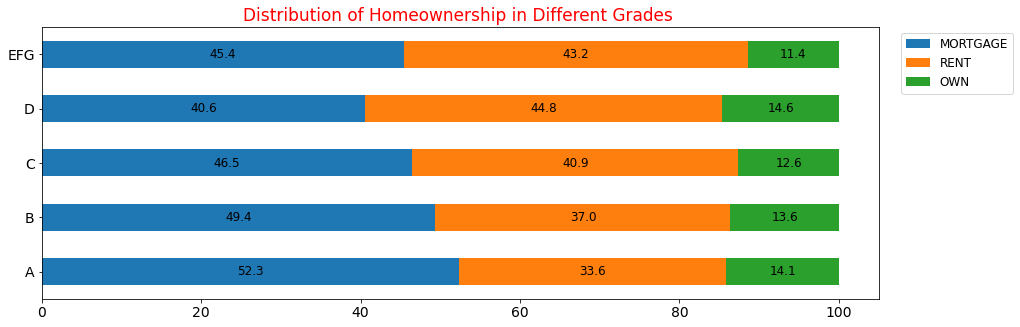

In [128]:
plot_stackedbarh(grade_homeownership, np.arange(len(grade_homeownership)), ['A', 'B', 'C','D','EFG']\
                 ,'Distribution of Homeownership in Different Grades ')
plt.show()

### It seems that having mortgage impacts the loan grade positively and having rental home impacts the loan grade negatively. Higher percentage of borrowers who already had mortgage received low risk loans; and lower percentage of borrowers who rent their home received low risk loans.

------------

### number of mortgage account

In [129]:
df.num_mort_accounts.head()

0    1
1    0
2    0
3    0
4    0
Name: num_mort_accounts, dtype: int64

In [130]:
num_mort = pd.DataFrame(round(100* df.num_mort_accounts.value_counts(normalize= True, dropna= False),2)).reset_index()
num_mort.columns = ['num_mort_accounts','pct']
num_mort.head()

,num_mort_accounts,pct
0,0,44.84
1,1,17.55
2,2,15.29
3,3,10.71
4,4,5.56


In [131]:
#Find Confidence interval
CI0 = df.num_mort_accounts.mean() - 3* df.num_mort_accounts.std()
CI1 = df.num_mort_accounts.mean() + 3* df.num_mort_accounts.std()
(CI0, CI1)

(-3.76872139018473, 6.53492139018473)

In [132]:
#what percentage higher than upper limit of CI
(df.num_mort_accounts > CI1).sum()/len(df)

0.0134

In [133]:
df.loc[df.num_mort_accounts > CI1, 'num_mort_accounts'] = int(CI1)

In [134]:
num_mort = pd.DataFrame(100 * df.num_mort_accounts.value_counts(normalize= True, dropna= False))
num_mort.reset_index(inplace= True)
num_mort.columns = ['num_mort_accounts', 'pct']
num_mort

,num_mort_accounts,pct
0,0,44.84
1,1,17.55
2,2,15.29
3,3,10.71
4,4,5.56
5,6,3.04
6,5,3.01


### Almost 45% of borrowers didn't have any mortgage accounts 

----------------------

### debt to income ratio

In [135]:
df.debt_to_income.head()

0    18.01
1     5.04
2    21.15
3    10.16
4    57.96
Name: debt_to_income, dtype: float64

In [136]:
df.debt_to_income.isna().sum() / len(df)

0.0024

### less that 0.3% are null.

In [137]:
df.debt_to_income.describe()

count    9976.000000
mean       19.308192
std        15.004851
min         0.000000
25%        11.057500
50%        17.570000
75%        25.002500
max       469.090000
Name: debt_to_income, dtype: float64

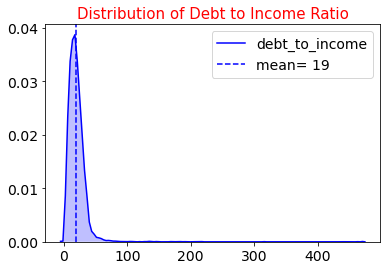

In [138]:
plot_kde(df.debt_to_income, 'blue', True, 'debt_to_income')
plt.title('Distribution of Debt to Income Ratio', fontsize= 15, color='red')
plt.legend()
plt.show()

In [139]:
CI1 = df.debt_to_income.mean()+ 3* df.debt_to_income.std()
CI1

64.32274557892313

In [140]:
(df.debt_to_income > CI1).sum() / len(df)

0.0078

### less than 1% of borrowers had debt income ratio greater than 64.3 as the upper bound of CI. 
let's correct the value of those outliers.

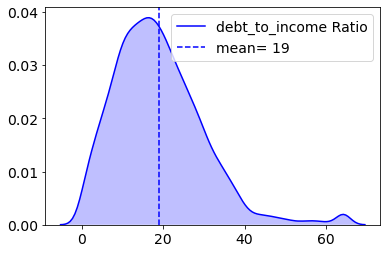

In [141]:
df.loc[df.debt_to_income > CI1, 'debt_to_income'] = CI1
plot_kde(df.debt_to_income, 'blue', True, 'debt_to_income Ratio')
plt.legend()
plt.show()

### Fill the NaN with median.

In [142]:
df.loc[df.debt_to_income.isna(), 'debt_to_income'] = round(df.debt_to_income.median(),2)
df.loc[df.debt_to_income > CI1, 'debt_to_income'] = CI1


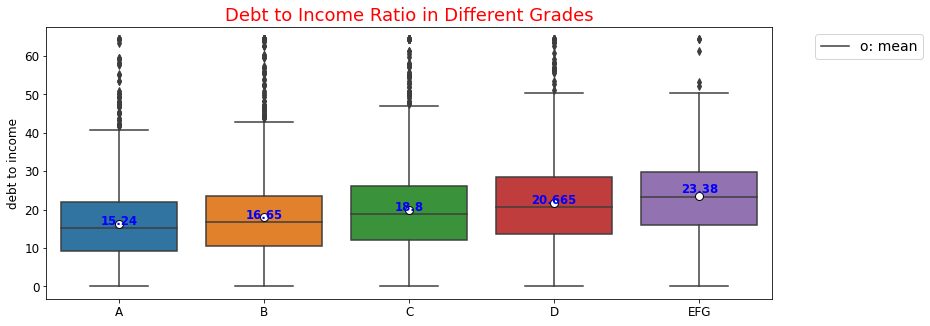

In [145]:
plt.figure(figsize=(13,5))
vertical_offset = df.debt_to_income.median()* 0.05
medians = df.groupby('grade')['debt_to_income'].median().sort_values().values
ranks = df.groupby('grade')['debt_to_income'].median().sort_values().index
plot_boxplot(df.grade, df.debt_to_income, ranks, vertical_offset, medians
             , 'debt to income','Debt to Income Ratio in Different Grades',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.05,1))
plt.show()

### As mean and median of debt to income increased, the borrowers received loans with higher risk.

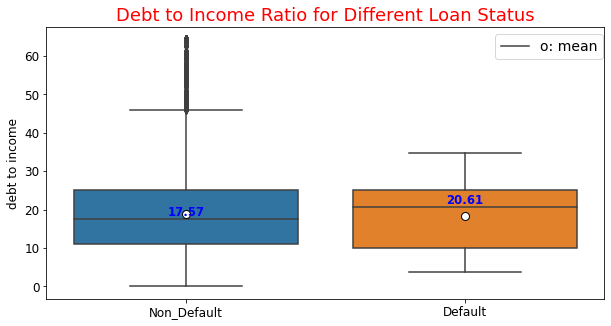

In [146]:
plt.figure(figsize=(10,5))
vertical_offset = df.debt_to_income.median()* 0.05
medians = df.groupby('default')['debt_to_income'].median().sort_values().values
ranks = df.groupby('default')['debt_to_income'].median().sort_values().index
plot_boxplot(df.default, df.debt_to_income, ranks, vertical_offset, medians
             , 'debt to income','Debt to Income Ratio for Different Loan Status',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.01,1))
plt.xticks([0,1], ['Non_Default', 'Default'], fontsize=12)
plt.show()

### Median of Debt to income for default loans was about about 3% higher that median for non-default.

-------------------

### total_debit_limit
Total of all bank card limits. A debit card spending maximum is set by the individual bank or credit union that issues the debit card. Try to spend more than the maximum allowed, and your debit card will be declined even if you have enough money in your checking account.

In [147]:
df.total_debit_limit.head()

0    11100
1    16500
2     4300
3    19400
4    32700
Name: total_debit_limit, dtype: int64

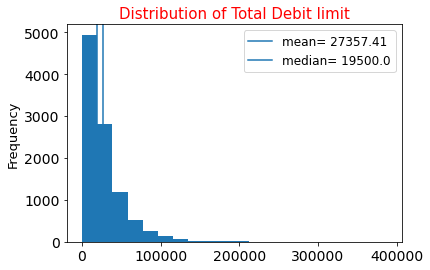

In [148]:
plot_hist(df.total_debit_limit, 'Distribution of Total Debit limit')
plt.show()

In [149]:
df.total_debit_limit.describe()

count     10000.000000
mean      27357.410300
std       26570.164081
min           0.000000
25%       10000.000000
50%       19500.000000
75%       36100.000000
max      386700.000000
Name: total_debit_limit, dtype: float64

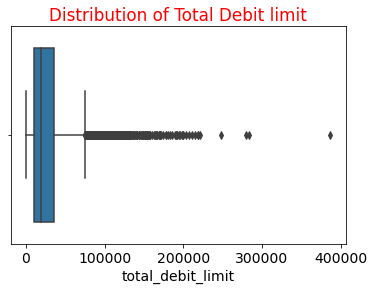

In [150]:
sns.boxplot(df.total_debit_limit)
plt.title('Distribution of Total Debit limit', color='red')
plt.show()

In [151]:
df.total_debit_limit.quantile(0.75)

36100.0

In [152]:
#Calculate interquartile
q1 = df.total_debit_limit.quantile(0.25)
q3 = df.total_debit_limit.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
(lower_limit , upper_limit) 

(-29150.0, 75250.0)

In [153]:
(df.total_debit_limit < lower_limit).sum()

0

In [154]:
df.loc[df.total_debit_limit > upper_limit, 'total_debit_limit']= upper_limit

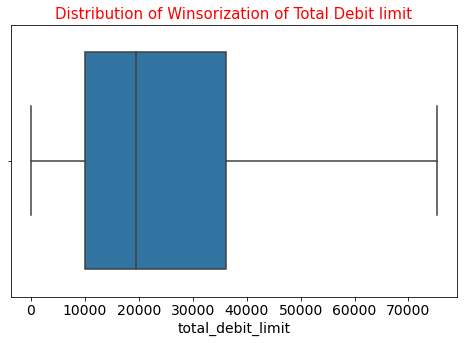

In [155]:
plot_one_boxplot(df.total_debit_limit, (8,5),'Distribution of Winsorization of Total Debit limit')
plt.show()

In [156]:
grade_total_debit= df[['grade','total_debit_limit']].sort_values(by='grade')
grade_total_debit.groupby('grade')['total_debit_limit'].median()

grade
A      30400.0
B      20000.0
C      15900.0
D      13400.0
EFG    13700.0
Name: total_debit_limit, dtype: float64

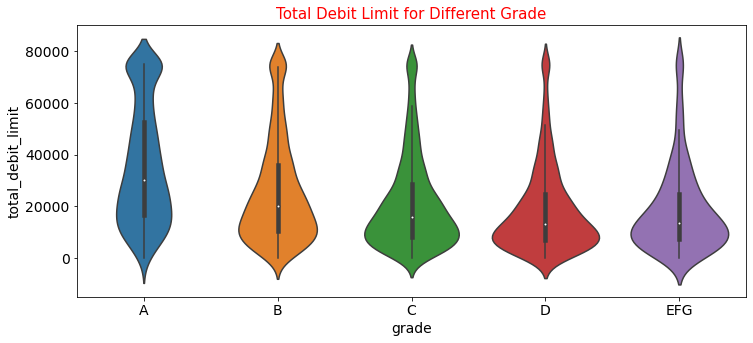

In [157]:
plot_violin(grade_total_debit.grade, grade_total_debit.total_debit_limit,(12,5),'Total Debit Limit for Different Grade')
plt.show()

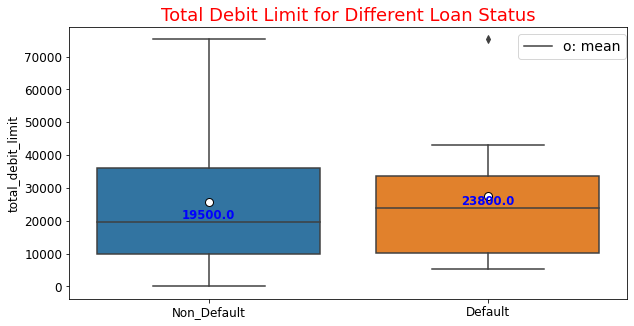

In [158]:
plt.figure(figsize=(10,5))
vertical_offset = df.total_debit_limit.median()* 0.05
medians = df.groupby('default')['total_debit_limit'].median().sort_values().values
ranks = df.groupby('default')['total_debit_limit'].median().sort_values().index
plot_boxplot(df.default, df.total_debit_limit, ranks, vertical_offset, medians
             , 'total_debit_limit','Total Debit Limit for Different Loan Status',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.01,1))
plt.xticks([0,1], ['Non_Default', 'Default'], fontsize=12)
plt.show()

### Median of Total Debit limit for borrowers with default loans was 4.3k dollars higher that median for borrowers woth non-default.

--------------

### num_active_debit_accounts
Number of currently active band cards.

In [159]:
df.num_active_debit_accounts.head()

0     2
1     3
2     3
3     2
4    10
Name: num_active_debit_accounts, dtype: int64

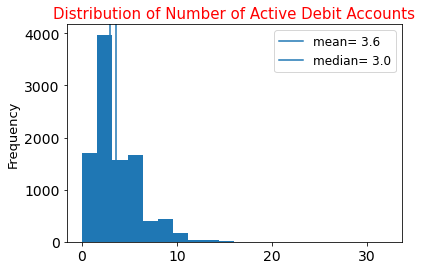

In [160]:
plot_hist(df.num_active_debit_accounts,'Distribution of Number of Active Debit Accounts')
plt.show()

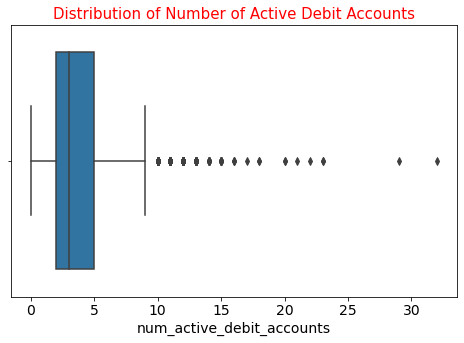

In [161]:
plot_one_boxplot(df.num_active_debit_accounts, (8,5),'Distribution of Number of Active Debit Accounts')
plt.show()

In [162]:
#Calculate interquartile
q1 = df.num_active_debit_accounts.quantile(0.25)
q3 = df.num_active_debit_accounts.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
(lower_limit , upper_limit) 

(-2.5, 9.5)

In [163]:
(df.num_active_debit_accounts < lower_limit).sum()

0

In [164]:
df.loc[df.num_active_debit_accounts > upper_limit, 'num_active_debit_accounts']= int(upper_limit)

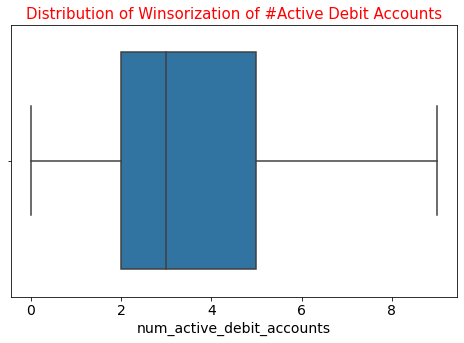

In [165]:
plot_one_boxplot(df.num_active_debit_accounts, (8,5),'Distribution of Winsorization of #Active Debit Accounts')
plt.show()

In [166]:
pd.DataFrame(100 * df.num_active_debit_accounts.value_counts(normalize= True, dropna= False))

,num_active_debit_accounts
3,19.87
2,19.85
4,15.68
1,13.79
5,10.44
6,6.19
9,4.17
7,3.92
0,3.33
8,2.76


In [167]:
num_active_debit_accounts = 100 * df.num_active_debit_accounts.value_counts(normalize= True, dropna= False)

num_active_debit_accounts= num_active_debit_accounts.sort_index()

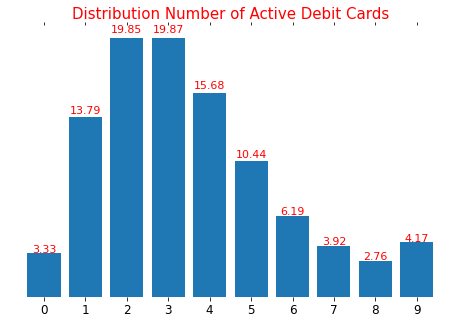

In [168]:
plot_bars(num_active_debit_accounts.index, num_active_debit_accounts, 'Distribution Number of Active Debit Cards'\
          , (8,5), 0)
plt.xticks(num_active_debit_accounts.index)
plt.show()

In [169]:
grade_n_debit = pd.DataFrame(round(100 * df.groupby(['grade'])['num_active_debit_accounts'].value_counts(normalize= True),2))
grade_n_debit.columns= ['pct']
grade_n_debit.reset_index(inplace= True)
grade_n_debit = pd.pivot_table(grade_n_debit, index=['grade'], columns= ['num_active_debit_accounts'], values= ['pct'])
grade_n_debit.reset_index(inplace= True)
grade_n_debit.columns= ['grade','no_debit', 'one_debit','two_debit','three_debit','four_debit','five_debit','six_debit'\
,'seven_debit','eight_debit','nine_debit']
grade_n_debit

,grade,no_debit,one_debit,two_debit,three_debit,four_debit,five_debit,six_debit,seven_debit,eight_debit,nine_debit
0,A,3.86,14.56,21.55,19.64,14.88,9.96,5.94,3.29,2.44,3.86
1,B,3.49,13.80,18.77,20.12,16.07,10.14,6.91,4.08,2.60,4.02
2,C,2.64,13.57,19.45,20.66,15.57,11.23,5.28,4.45,2.83,4.33
3,D,3.46,13.28,20.47,17.70,15.91,10.10,7.47,4.08,2.90,4.63
4,EFG,2.96,12.35,18.02,21.98,17.53,11.60,3.70,2.47,4.94,4.44


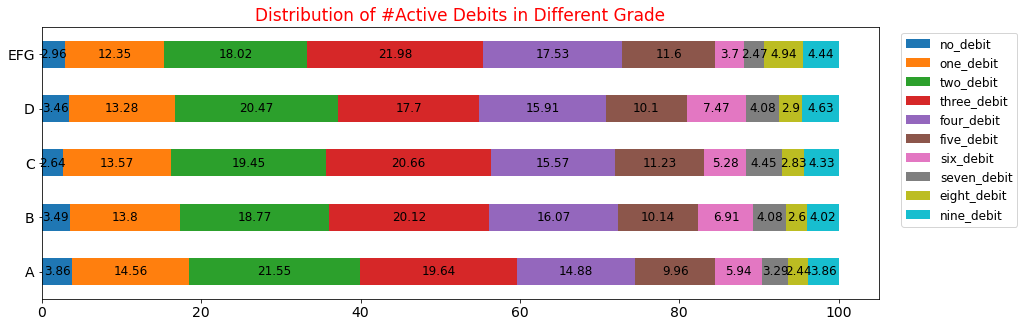

In [170]:
plot_stackedbarh(grade_n_debit, np.arange(len(grade_n_debit)) ,['A', 'B', 'C','D','EFG']\
                 ,'Distribution of #Active Debits in Different Grade')
plt.show()

### Median of total debit limit for borrowers received lower risk loans were higher than higher risk loan, while most of them had fewer number of active debit cards.

In [171]:
default_n_debit = pd.DataFrame(round(100 * df.groupby(['default'])['num_active_debit_accounts']\
                                     .value_counts(normalize= True),2))
default_n_debit.columns= ['pct']
default_n_debit.reset_index(inplace= True)
default_n_debit = pd.pivot_table(default_n_debit, index=['default'], columns= ['num_active_debit_accounts'], values= ['pct'])

default_n_debit.fillna(0, inplace= True)
default_n_debit.columns = [0,1,2,3,4,5,6,7,8,9]
default_n_debit

,0,1,2,3,4,5,6,7,8,9
default,,,,,,,,,,
0,3.33,13.79,19.84,19.86,15.69,10.44,6.19,3.91,2.76,4.17
1,0.00,14.29,28.57,28.57,0.00,14.29,0.00,14.29,0.00,0.00


In [172]:
default_n_debit.loc[0,:]

0     3.33
1    13.79
2    19.84
3    19.86
4    15.69
5    10.44
6     6.19
7     3.91
8     2.76
9     4.17
Name: 0, dtype: float64

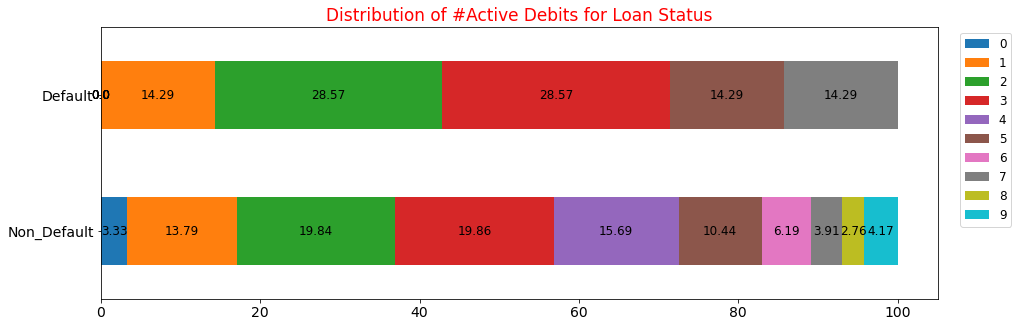

In [173]:
plot_stackedbarh(default_n_debit, np.arange(len(default_n_debit)) ,['Non_Default', 'Default']\
                 ,'Distribution of #Active Debits for Loan Status')
plt.ylabel('')
plt.show()

### More than 55% of borrowers with default loans had 2 or 3 active debit cards.

---------------

### application_type

In [174]:
df.application_type.head()

0    individual
1    individual
2    individual
3    individual
4         joint
Name: application_type, dtype: object

In [175]:
application_type = 100* df.application_type.value_counts(normalize= True, dropna= False)

<BarContainer object of 2 artists>

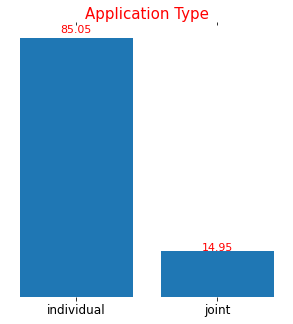

In [176]:
plot_bars(application_type.index, application_type, 'Application Type', (5,5), 0)

In [177]:
default_appl_type = pd.DataFrame(round(100 *df.groupby('default')['application_type']\
                                       .value_counts(normalize= True, dropna= False),1))
default_appl_type.columns= ['pct']
default_appl_type.reset_index(inplace= True)
default_appl_type = pd.pivot_table(default_appl_type, index=['default'], columns=['application_type'], values=['pct'])
default_appl_type.columns = ['individual', 'joint']
default_appl_type

,individual,joint
default,,
0,85.0,15.0
1,85.7,14.3


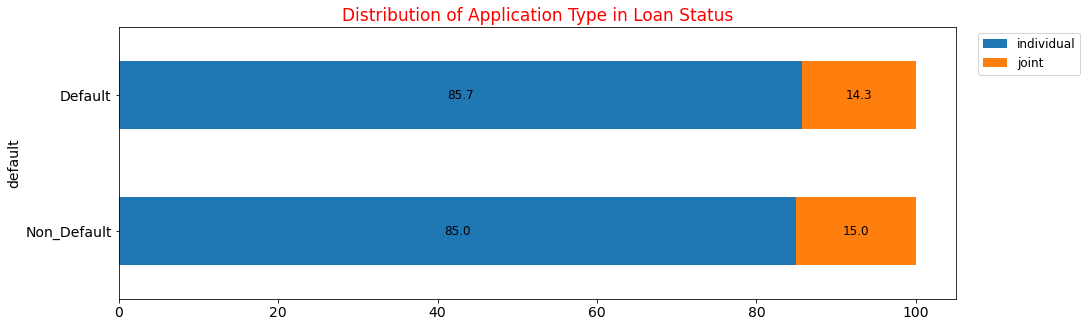

In [178]:
plot_stackedbarh(default_appl_type, np.arange(len(default_appl_type)), ['Non_Default', 'Default']\
                 ,'Distribution of Application Type in Loan Status')
plt.xlabel('')
plt.show()

### It seems that application type are similar in different loan status. 

-----------

### Annual_income_joint

In [179]:
df.annual_income_joint.head()

0        NaN
1        NaN
2        NaN
3        NaN
4    57000.0
Name: annual_income_joint, dtype: float64

In [180]:
df.annual_income_joint.describe()

count    1.495000e+03
mean     1.279146e+05
std      7.016838e+04
min      1.920000e+04
25%      8.683350e+04
50%      1.130000e+05
75%      1.515455e+05
max      1.100000e+06
Name: annual_income_joint, dtype: float64

In [181]:
grade_joint = pd.DataFrame(round(100 * df.groupby('grade')['application_type'].value_counts(normalize= True),2))
grade_joint.columns= ['pct']
grade_joint.reset_index(inplace=True)
grade_joint= pd.pivot_table(grade_joint, index= ['grade'], columns= ['application_type'], values= ['pct'])
grade_joint.columns= ['Individual', 'Joint']
grade_joint.reset_index(inplace= True)
grade_joint

,grade,Individual,Joint
0,A,87.11,12.89
1,B,85.97,14.03
2,C,84.89,15.11
3,D,82.30,17.70
4,EFG,76.54,23.46


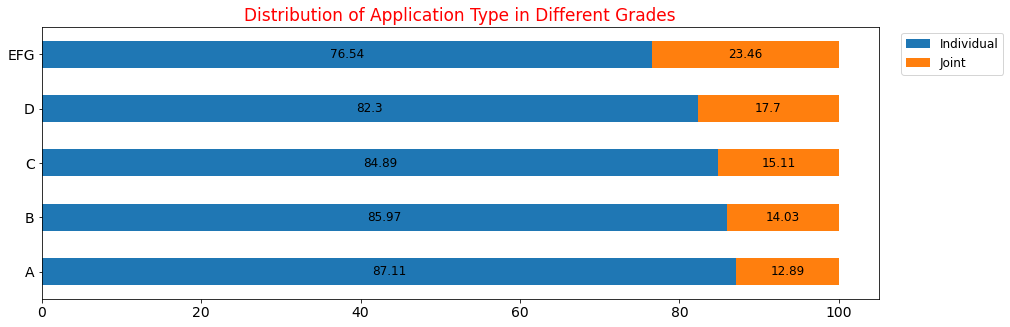

In [182]:
plot_stackedbarh(grade_joint, np.arange(len(grade_joint)), ['A','B','C','D','EFG']\
                 ,'Distribution of Application Type in Different Grades')
plt.show()

### Having co-signer seems that negatively impact the loan grade.

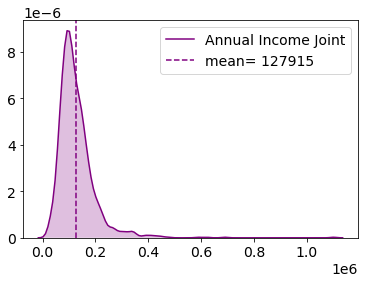

In [183]:
plot_kde(df.annual_income_joint, 'purple', True, 'Annual Income Joint')
plt.legend()
plt.show()

In [184]:
upper_bound = round(df.annual_income_joint.mean() + 3 * df.annual_income_joint.std(),0)
upper_bound

338420.0

In [185]:
((df.annual_income_joint > upper_bound).sum())/len(df.annual_income_joint>0)

0.0026

In [186]:
df.loc[df.annual_income_joint > upper_bound, 'annual_income_joint'] = upper_bound

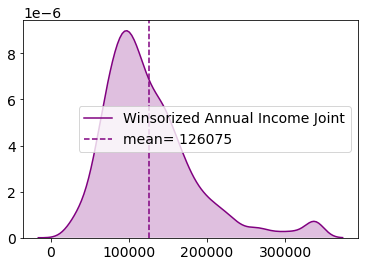

In [187]:
plot_kde(df.annual_income_joint, 'purple', True, 'Winsorized Annual Income Joint')
plt.legend()
plt.show()

In [188]:
state_annual_income_joint = pd.DataFrame(round(df.groupby('state')['annual_income_joint'].mean(),2))
state_annual_income_joint.columns= ['mean_annual_income_joint']
state_annual_income_joint.reset_index(inplace= True)
state_annual_income_joint.head()
state_income = df[['state', 'annual_income_joint']]
state_income.head()

,state,annual_income_joint
0,NJ,NaN
1,HI,NaN
2,WI,NaN
3,PA,NaN
4,CA,57000.0


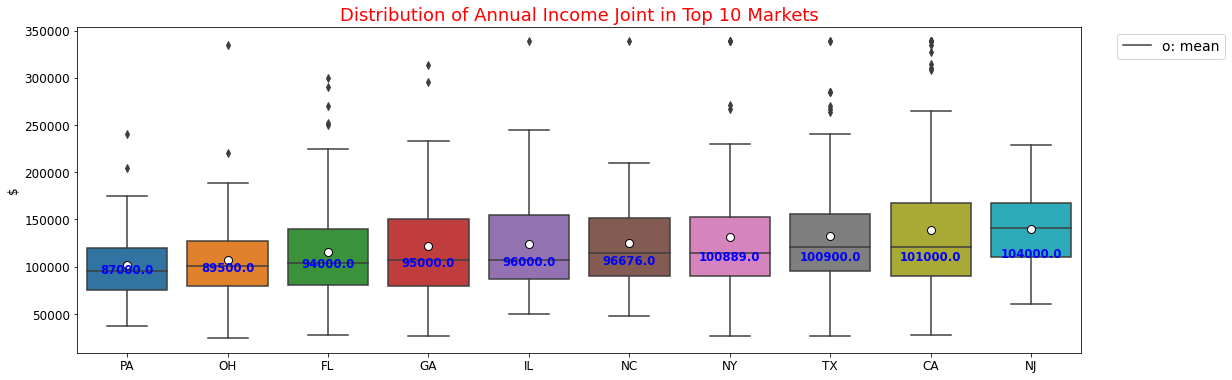

In [189]:
lst_top_state = pd.DataFrame(top_states.state)
top_state_income = pd.merge(lst_top_state,  state_income, on= 'state', how='inner')
top_state_income.set_index('state',inplace= True)
top_state_income

plt.figure(figsize=(18,6))
vertical_offset = state_income.annual_income_joint.median()* 0.05
ranks = top_state_income.groupby('state')['annual_income_joint'].median().sort_values(ascending= True).index
medians = round(state_income.groupby('state')['annual_income_joint'].median()).sort_values().values
plot_boxplot(top_state_income.index, top_state_income.annual_income_joint, ranks, vertical_offset, medians,'$'
             , 'Distribution of Annual Income Joint in Top 10 Markets',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.15,1))
plt.show()

### Median of annual income joint in NJ was 3k dollars higher than CA , TX , and NY; and 10k dollars higher than FL.

In [190]:
df.loc[((df.annual_income > 0) & (df.annual_income_joint.isna() == True)), 'annual_income_joint']=\
df.loc[((df.annual_income > 0) & (df.annual_income_joint.isna() == True)), 'annual_income']

In [191]:
df.annual_income_joint.isna().sum()

0

In [192]:
df.rename(columns= {'annual_income': 'individual_annual_income', 'annual_income_joint': 'joint_annual_income'}, inplace= True)

### for those 85% of single borrowers (without co-signer), annual income joint is equal to their annual income. So, the null values in annual_income_joint were replaced with the borrowers annual_income.
### Column name of annual_income was replaced with individual_annual_income, and column name of annual_income_joint was replaced with joint_annual_income.

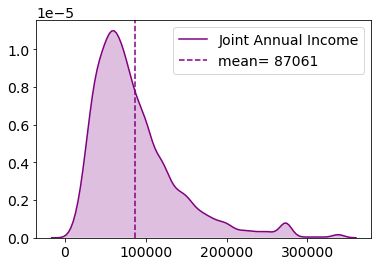

In [193]:
plot_kde(df.joint_annual_income, 'purple', True, 'Joint Annual Income')
plt.legend()
plt.show()

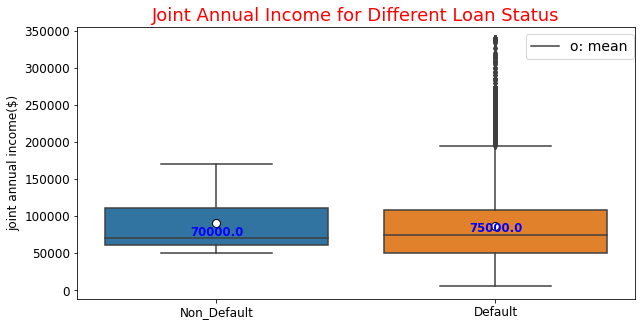

In [194]:
plt.figure(figsize=(10,5))
vertical_offset = df.joint_annual_income.median()* 0.05
medians = df.groupby('default')['joint_annual_income'].median().sort_values().values
ranks = df.groupby('default')['joint_annual_income'].median().sort_values().index
plot_boxplot(df.default, df.joint_annual_income, ranks, vertical_offset, medians
             , 'joint annual income($)','Joint Annual Income for Different Loan Status',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.01,1))
plt.xticks([0,1], ['Non_Default', 'Default'], fontsize=12)
plt.show()

### The median of joint annual income for Borrowers with default loans was by 5k dollars higher than borrowers with non-default loans.

-----

### verified_income and verification_income_joint
verified_income: Type of verification of the applicants residence.

verification_income_joint: Type of verification of the joint income.

In [195]:
verified_income = pd.DataFrame(round(100 * df.verified_income.value_counts(normalize= True, dropna= False),2))
verified_income.reset_index(inplace= True)
verified_income.columns= ['verified_income', 'pct']
verified_income


,verified_income,pct
0,Source Verified,41.16
1,Not Verified,35.94
2,Verified,22.90


In [196]:
verification_income_joint = pd.DataFrame(round(100 *df.verification_income_joint.value_counts(normalize= True, dropna= False),2))
verification_income_joint.reset_index(inplace= True)
verification_income_joint.columns= ['verification_income_joint', 'pct']
verification_income_joint


,verification_income_joint,pct
0,NaN,85.45
1,Not Verified,6.11
2,Source Verified,4.99
3,Verified,3.45


### Those 85% of single borrowers had Null value in column of verification_income_joint, which makes sense to replace null values with 'Not Verified'.

### Column name of verified_income was replaced with individual_income_verification, and column name of verification_income_joint was replaced with joint_income_verification.

In [197]:
df.verification_income_joint.fillna('Not Verified', inplace= True)

In [198]:
df.rename(columns= {'verified_income': 'individual_income_verification'\
                    , 'verification_income_joint': 'joint_income_verification'}, inplace= True)

In [199]:
total_income_verification = pd.DataFrame(round(100 *df.joint_income_verification\
                                               .value_counts(normalize= True, dropna= False),2))
total_income_verification.reset_index(inplace= True)
total_income_verification.columns= ['joint_income_verification', 'pct']
total_income_verification

,joint_income_verification,pct
0,Not Verified,91.56
1,Source Verified,4.99
2,Verified,3.45


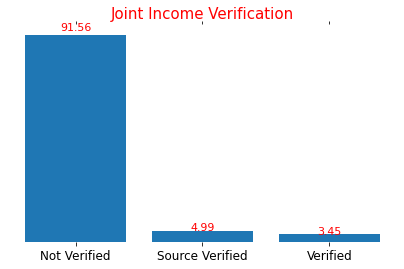

In [200]:
plot_bars(total_income_verification.joint_income_verification, total_income_verification.pct\
          , 'Joint Income Verification', (7,4), 0)
plt.show()

In [201]:
singular_income_verification = pd.DataFrame(round(100 *df.individual_income_verification\
                                                  .value_counts(normalize= True, dropna= False),2))
singular_income_verification.reset_index(inplace= True)
singular_income_verification.columns= ['individual_income_verification', 'pct']
singular_income_verification

,individual_income_verification,pct
0,Source Verified,41.16
1,Not Verified,35.94
2,Verified,22.90


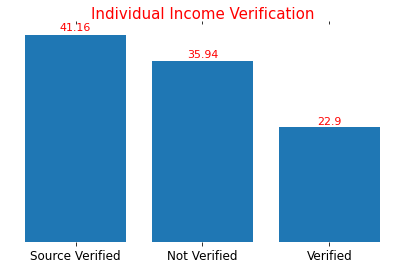

In [202]:
plot_bars(singular_income_verification.individual_income_verification, singular_income_verification.pct\
          , 'Individual Income Verification', (7,4), 0)
plt.show()

-----

### debt_to_income_joint
Debt to income ratio for two parties.

In [203]:
df.debt_to_income.isna().sum()

0

In [204]:
df.debt_to_income_joint.value_counts(normalize= True, dropna= False).head(5)

NaN      0.8505
21.42    0.0005
15.58    0.0004
20.88    0.0004
22.60    0.0004
Name: debt_to_income_joint, dtype: float64

### Those 85% of single borrowers had Null value in column of debt_to_income_joint, which makes sense to replace null values with the borrowers' debt_to_income'.


### Column name of debt_to_income was replaced with individual_debt_to_income, and column name of debt_to_income_joint was replaced with joint_debt_to_income.

In [205]:
df.loc[((df.debt_to_income.isna() == False) & (df.debt_to_income_joint.isna() == True)),'debt_to_income_joint'] = df.loc[((df.debt_to_income.isna() == False) & (df.debt_to_income_joint.isna() == True)),'debt_to_income']

In [206]:
df.debt_to_income_joint.isna().sum()

0

In [207]:
df.rename(columns= {'debt_to_income': 'individual_debt_to_income'\
                    , 'debt_to_income_joint': 'joint_debt_to_income'}, inplace= True)

In [208]:
total_debt_to_income = pd.DataFrame(round(100 *df.joint_debt_to_income.value_counts(normalize= True, dropna= False),2))
total_debt_to_income.reset_index(inplace= True)
total_debt_to_income.columns= ['joint_debt_to_income', 'pct']
total_debt_to_income.head()

,joint_debt_to_income,pct
0,0.00,0.22
1,16.11,0.13
2,19.42,0.12
3,20.66,0.12
4,13.20,0.12


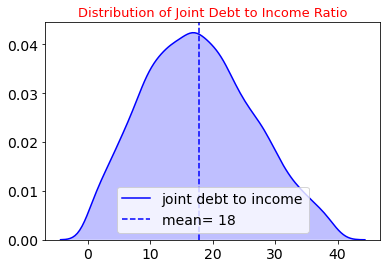

In [209]:
plot_kde(df.joint_debt_to_income, 'blue', True, 'joint debt to income')
plt.title('Distribution of Joint Debt to Income Ratio', fontsize= 13, color='red')
plt.legend()
plt.show()


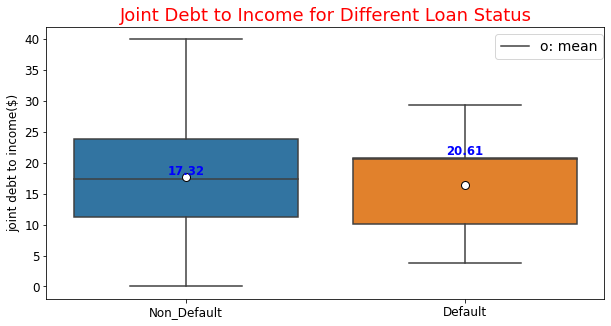

In [210]:
plt.figure(figsize=(10,5))
vertical_offset = df.joint_debt_to_income.median()* 0.04
medians = df.groupby('default')['joint_debt_to_income'].median().sort_values().values
ranks = df.groupby('default')['joint_debt_to_income'].median().sort_values().index
plot_boxplot(df.default, df.joint_debt_to_income, ranks, vertical_offset, medians
             , 'joint debt to income($)','Joint Debt to Income for Different Loan Status',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.01,1))
plt.xticks([0,1], ['Non_Default', 'Default'], fontsize=12)
plt.show()

### Median of joint debt to income for borrowers with default loan was higher than those with non-default loans by 3.31%.

--------

### inquiries_last_12m
Inquiries into the applicant's credit during the last 12 months.

'a credit inquiry is a credit check. Inquiries happen when there is a legally permitted request to see your credit report from a company or person.'https://www.transunion.com/article/credit-corner-whats-an-inquiry

'Each lender typically has a limit of how many inquiries are acceptable.'https://bettercreditblog.org/how-many-inquiries-is-too-many/

In [211]:
df.inquiries_last_12m.head()

0    6
1    1
2    4
3    0
4    7
Name: inquiries_last_12m, dtype: int64

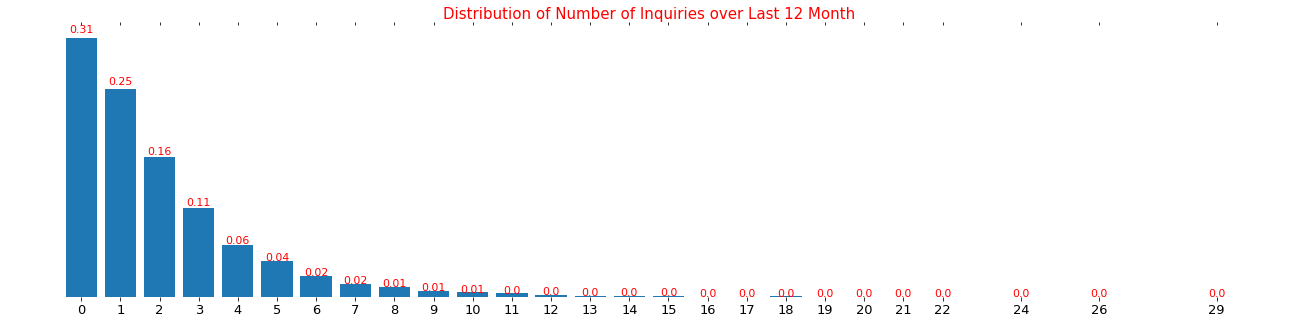

In [212]:
inquiries_last_12m = df.inquiries_last_12m.value_counts(normalize= True, dropna= False)
plot_bars(inquiries_last_12m.index, inquiries_last_12m, 'Distribution of Number of Inquiries over Last 12 Month', (23,5), 0)
plt.xticks(inquiries_last_12m.index, fontsize=13)
plt.show()

In [213]:
#Calculate interquartile
q1 = df.inquiries_last_12m.quantile(0.25)
q3 = df.inquiries_last_12m.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
(lower_limit , upper_limit)

(-4.5, 7.5)

In [214]:
df.loc[df.inquiries_last_12m > upper_limit, 'inquiries_last_12m']= int(upper_limit)

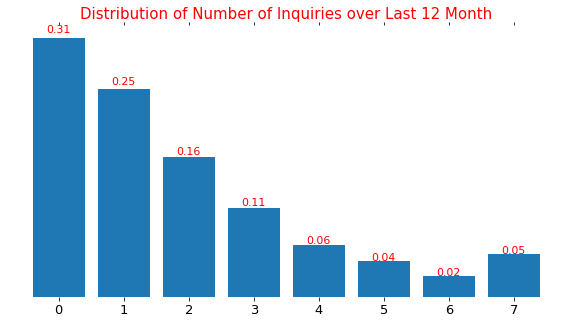

In [215]:
inquiries_last_12m = df.inquiries_last_12m.value_counts(normalize= True, dropna= False)
inquiries_last_12m.sort_index(inplace= True)
plot_bars(inquiries_last_12m.index, inquiries_last_12m, 'Distribution of Number of Inquiries over Last 12 Month', (10,5), 0)
plt.xticks(inquiries_last_12m.index, fontsize=13)
plt.show()

In [216]:
grade_inqur = pd.DataFrame(round(100* df.groupby('grade')['inquiries_last_12m']\
                                        .value_counts(normalize= True, dropna= False),2))
grade_inqur.columns= ['pct']
grade_inqur = pd.pivot_table(grade_inqur, index=['grade'], columns= ['inquiries_last_12m'], values=['pct'])
grade_inqur.reset_index(inplace= True)
grade_inqur.columns = ['grade'] + inquiries_last_12m.index.tolist()
grade_inqur

,grade,0,1,2,3,4,5,6,7
0,A,39.32,23.67,15.45,8.70,5.33,3.05,1.83,2.64
1,B,30.42,26.77,16.27,10.08,5.43,3.98,2.27,4.77
2,C,28.01,23.82,16.66,11.31,6.52,5.01,2.79,5.88
3,D,22.68,23.79,18.53,12.17,7.75,4.84,2.77,7.47
4,EFG,24.20,21.98,16.05,14.07,7.16,5.68,3.46,7.41


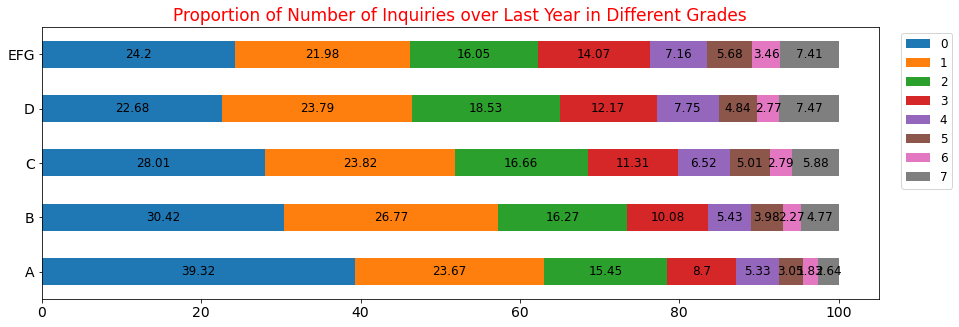

In [217]:
plot_stackedbarh(grade_inqur, np.arange(len(grade_inqur)), ['A','B','C','D','EFG']\
                 ,'Proportion of Number of Inquiries over Last Year in Different Grades')
plt.show()

### Majority of borrowers with zero inquiries over last year recieved low risk loans. In contrast, majority of borrowers with 2 or more inquiries got higher risk loans.

In [218]:
default_inq = pd.DataFrame(round(100 * df.groupby('default')['inquiries_last_12m'].value_counts(normalize= True),2))
default_inq.columns= ['pct']
default_inq.reset_index(inplace=True)
default_inq = pd.pivot_table(default_inq, index= ['default'], columns= ['inquiries_last_12m'], values= ['pct'])
default_inq.fillna(0, inplace=True)
default_inq.columns = [0,1,2,3,4,5,6,7]
default_inq

,0,1,2,3,4,5,6,7
default,,,,,,,,
0,30.62,24.59,16.5,10.51,6.1,4.22,2.41,5.04
1,0.00,42.86,0.0,42.86,0.0,0.00,14.29,0.00


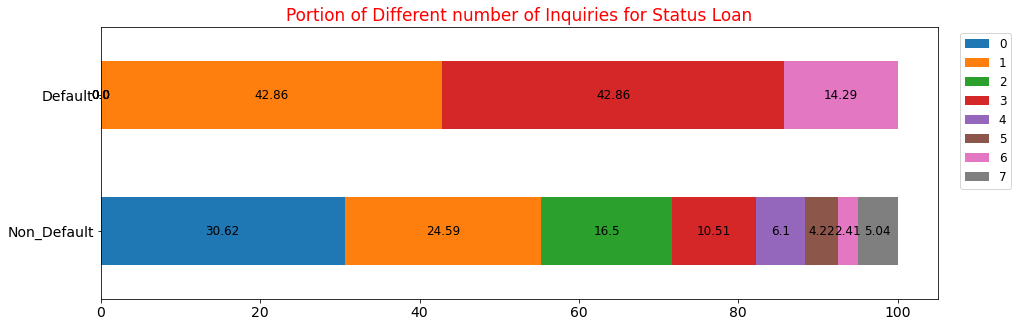

In [219]:
plot_stackedbarh(default_inq, np.arange(len(default_inq)), ['Non_Default','Default']\
                 ,'Portion of Different number of Inquiries for Status Loan')
plt.ylabel('')
plt.show()

### Majority of borrowers with default loans had one or three Inquiries over last 2 years.

-----------

### months_since_last_credit_inquiry
Number of months since tha last credit inquiry on this applicant.

In [220]:
df.months_since_last_credit_inquiry.head()

0     5.0
1     8.0
2     7.0
3    15.0
4     4.0
Name: months_since_last_credit_inquiry, dtype: float64

In [221]:
df.months_since_last_credit_inquiry.value_counts(normalize= True, dropna= False).head()

NaN    0.1271
1.0    0.0796
2.0    0.0740
0.0    0.0693
3.0    0.0663
Name: months_since_last_credit_inquiry, dtype: float64

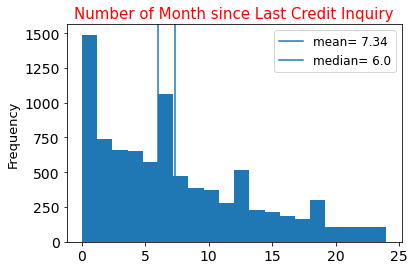

In [222]:
plot_hist(df.months_since_last_credit_inquiry, 'Number of Month since Last Credit Inquiry')
plt.show()

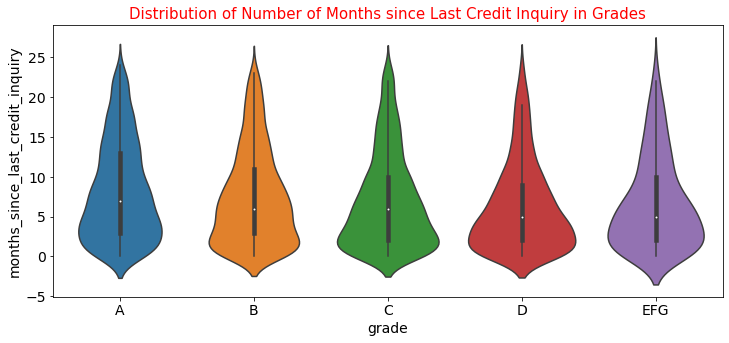

In [223]:
grade_months_last_inq = df[['grade','months_since_last_credit_inquiry']].sort_values(by='grade')
plot_violin( grade_months_last_inq.grade, grade_months_last_inq.months_since_last_credit_inquiry,(12,5)\
            ,'Distribution of Number of Months since Last Credit Inquiry in Grades')
plt.show()

### Fewer number of borrowers with positive number of months since last credit inquiry got grade A loans.

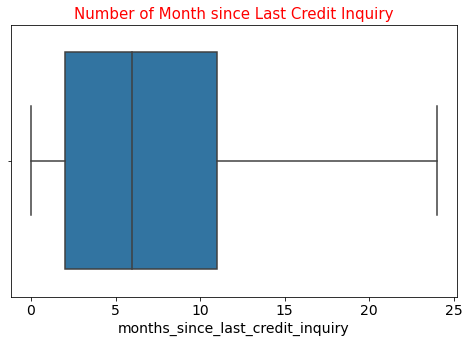

In [224]:
plot_one_boxplot(df.months_since_last_credit_inquiry,(8,5), 'Number of Month since Last Credit Inquiry')
plt.show()

In [225]:
q1 = df.months_since_last_credit_inquiry.quantile(0.25)
q3 = df.months_since_last_credit_inquiry.quantile(0.75)
IQR = q3-q1
lower_limit= q1 - 1.5 * IQR
upper_limit= q3 + 1.5 * IQR
(lower_limit , upper_limit)

(-11.5, 24.5)

In [226]:
df.loc[df.months_since_last_credit_inquiry > int(upper_limit), 'months_since_last_credit_inquiry'] = int(upper_limit)

In [227]:
df.months_since_last_credit_inquiry.fillna(int(df.months_since_last_credit_inquiry.median()),inplace= True)

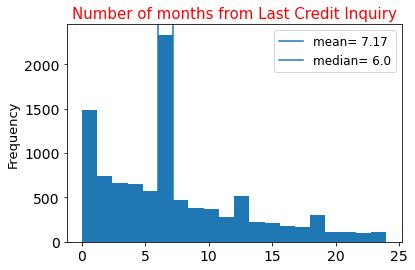

In [228]:
plot_hist(df.months_since_last_credit_inquiry, 'Number of months from Last Credit Inquiry')
plt.show()

### Values greater than upper limit of 24 were replaced with upper limit. There were 12.7% null values, they were filled with median of 7.

## ---- Features Related to Credit Card

### earliest_credit_line

In [229]:
df.earliest_credit_line.head()

0    2001
1    1996
2    2006
3    2007
4    2008
Name: earliest_credit_line, dtype: int64

In [230]:
df.earliest_credit_line.isna().sum()

0

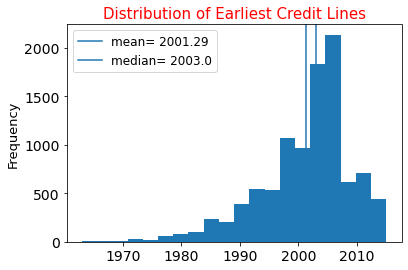

In [231]:
plot_hist(df.earliest_credit_line, 'Distribution of Earliest Credit Lines')
plt.show()

In [232]:
df.earliest_credit_line.describe()

count    10000.00000
mean      2001.29000
std          7.79551
min       1963.00000
25%       1997.00000
50%       2003.00000
75%       2006.00000
max       2015.00000
Name: earliest_credit_line, dtype: float64

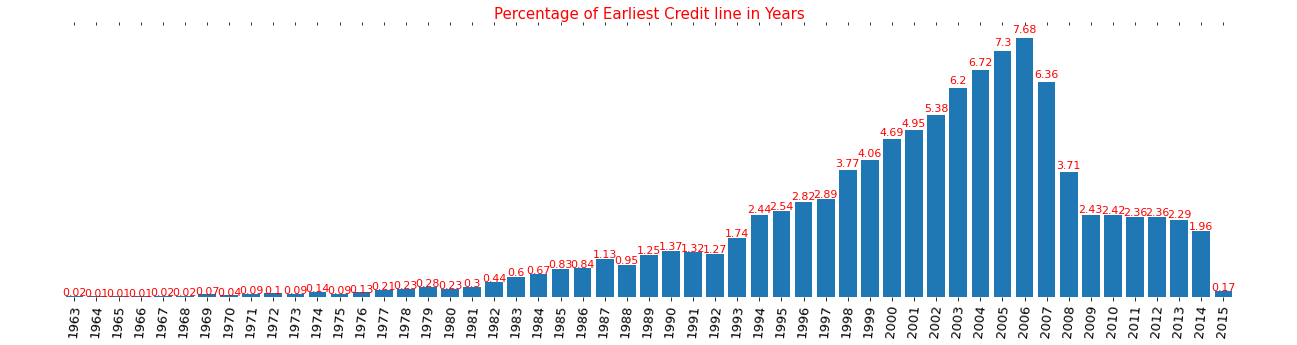

In [233]:
earliest_credit_line = 100 *df.earliest_credit_line.value_counts(normalize= True, dropna= False)
plot_bars(earliest_credit_line.index, earliest_credit_line, 'Percentage of Earliest Credit line in Years', (23,5), 85)
plt.xticks(earliest_credit_line.index, fontsize=13)
plt.show()

### Percentage of earliest credit lines only between 1998 and 2008 were greater than 3%.
### Percentage of earliest credit lines from 1992 continuously increased until 2006; then the portion decreased from 2006 to 2014. Recession between the end of Dec-2007 and Jun-2009 might be the reason of drop of portion in those years.


In [234]:
grade_earliest_cc = pd.DataFrame(round(100 * df.groupby('grade')['earliest_credit_line'].value_counts(normalize= True), 2))
grade_earliest_cc.columns = ['pct']
grade_earliest_cc.reset_index(inplace= True)
grade_earliest_cc.head()

,grade,earliest_credit_line,pct
0,A,2005,6.91
1,A,2006,6.55
2,A,2002,6.22
3,A,2004,5.94
4,A,2001,5.86


In [235]:
grade_earliest_cc_1998_2008 = grade_earliest_cc.loc[(grade_earliest_cc.earliest_credit_line >= 1998)\
                                        & (grade_earliest_cc.earliest_credit_line<= 2008),:]
grade_earliest_cc_1998_2008.head()

,grade,earliest_credit_line,pct
0,A,2005,6.91
1,A,2006,6.55
2,A,2002,6.22
3,A,2004,5.94
4,A,2001,5.86


In [236]:
grade_earliest_cc_1998_2008= pd.pivot_table(grade_earliest_cc_1998_2008, index=['grade'], columns=['earliest_credit_line'], values= ['pct'])
grade_earliest_cc_1998_2008.columns = [str(yr) for yr in np.arange(1998, 2009)]
grade_earliest_cc_1998_2008.reset_index(inplace= True)
grade_earliest_cc_1998_2008

,grade,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,A,3.62,3.86,5.33,5.86,6.22,5.73,5.94,6.91,6.55,5.16,3.17
1,B,4.28,4.68,4.97,4.74,5.40,5.89,6.85,7.28,7.18,6.09,4.02
2,C,3.43,4.00,3.77,4.71,4.82,6.52,7.39,7.46,8.03,6.97,4.00
3,D,3.60,3.18,4.56,4.63,4.84,6.50,6.98,6.98,9.68,7.54,3.87
4,EFG,3.70,4.20,5.19,3.70,5.68,8.15,5.19,9.88,8.89,7.41,2.22


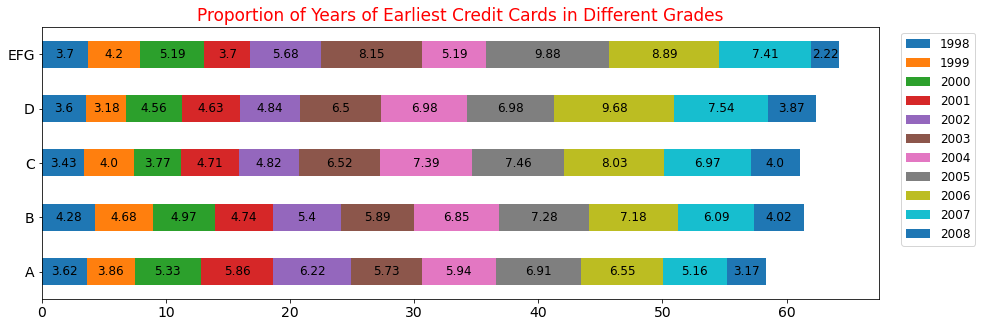

In [237]:
plot_stackedbarh(grade_earliest_cc_1998_2008, np.arange(len(grade_earliest_cc_1998_2008)), ['A','B','C','D','EFG']\
                 ,'Proportion of Years of Earliest Credit Cards in Different Grades')
plt.show()

### Borrowers who their earliest credit cards issued in 2003, 2006 and 2007 had bigger portion in high risk loans than low risk ones.

------------------------

### total_credit_lines
Total number of credit lines in this applicant's credit history.

In [238]:
df.total_credit_lines.head()

0    28
1    30
2    31
3     4
4    22
Name: total_credit_lines, dtype: int64

In [239]:
df.total_credit_lines.isna().sum()

0

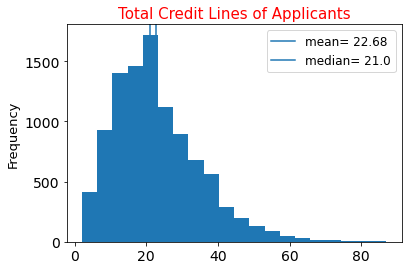

In [240]:
plot_hist(df.total_credit_lines, 'Total Credit Lines of Applicants')
plt.show()

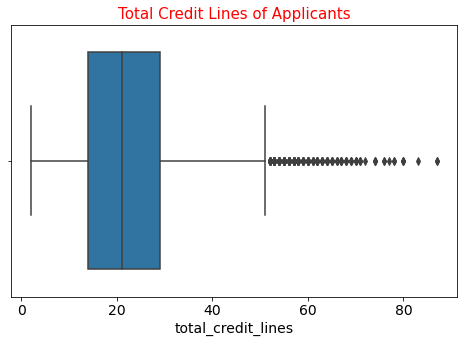

In [241]:
plot_one_boxplot(df.total_credit_lines,(8,5), 'Total Credit Lines of Applicants')
plt.show()

In [242]:
q1 = df.total_credit_lines.quantile(0.25)
q3 = df.total_credit_lines.quantile(0.75)
IQR = q3-q1
lower_limit= q1 - 1.5 * IQR
upper_limit= q3 + 1.5 * IQR
(lower_limit , upper_limit)

(-8.5, 51.5)

In [243]:
df.loc[df.total_credit_lines > int(upper_limit), 'total_credit_lines'] = int(upper_limit)

In [244]:
df.total_credit_lines.describe()

count    10000.000000
mean        22.479900
std         11.270328
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         51.000000
Name: total_credit_lines, dtype: float64

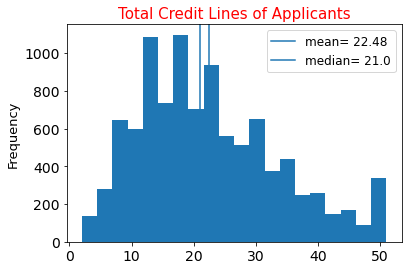

In [245]:
plot_hist(df.total_credit_lines, 'Total Credit Lines of Applicants')
plt.show()

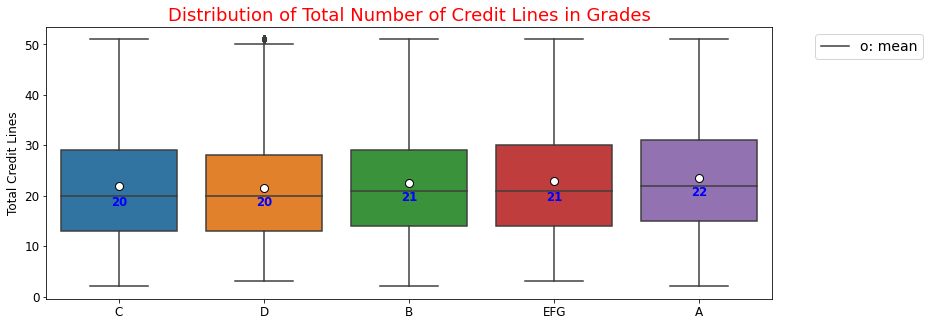

In [246]:
plt.figure(figsize=(13,5))
vertical_offset = df.total_credit_lines.median()* -0.1
medians = df.groupby('grade')['total_credit_lines'].median().sort_values().values
ranks = df.groupby('grade')['total_credit_lines'].median().sort_values().index
plot_boxplot(df.grade, df.total_credit_lines, ranks, vertical_offset, medians
             , 'Total Credit Lines','Distribution of Total Number of Credit Lines in Grades',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.05,1))
plt.show()

### Distribution of total number of credit lines for different grades are similar. Only among grade A loans, the median is greater by one compared with other grades.

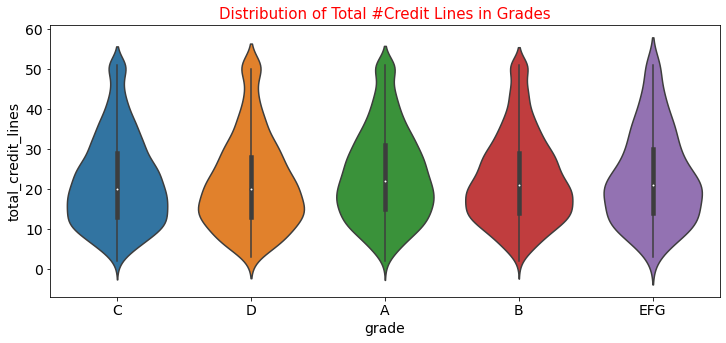

In [247]:
plot_violin(df.grade, df.total_credit_lines,(12,5),'Distribution of Total #Credit Lines in Grades')
plt.show()

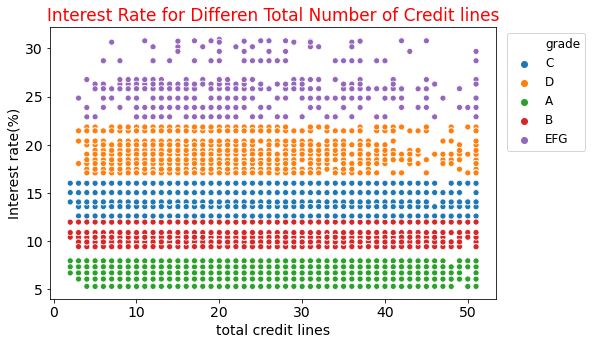

In [248]:
plt.figure(figsize= (8,5))
plot_scatter(df.total_credit_lines, df.interest_rate, df.grade, 'total credit lines', 'Interest rate(%)'
             , 'Interest Rate for Differen Total Number of Credit lines')
plt.show()

### Interest rate was independent from total number of credit lines, it was dependent to the grade.

---------------

### open_credit_lines
Number of currently open lines of credits.

In [249]:
df.open_credit_lines.head()

0    10
1    14
2    10
3     4
4    16
Name: open_credit_lines, dtype: int64

In [250]:
df.open_credit_lines.isna().sum()

0

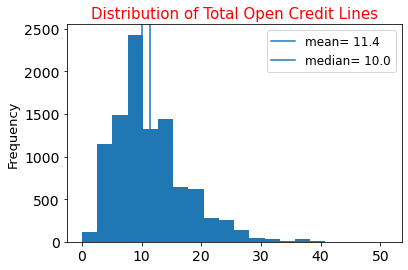

In [251]:
plot_hist(df.open_credit_lines, 'Distribution of Total Open Credit Lines')
plt.show()

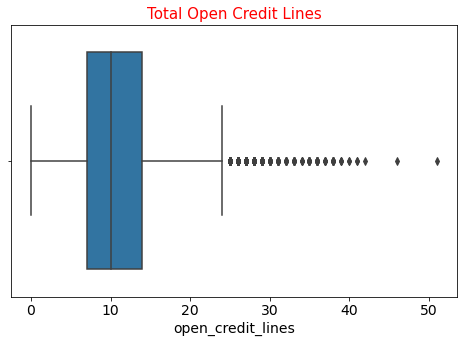

In [252]:
plot_one_boxplot(df.open_credit_lines,(8,5), 'Total Open Credit Lines')
plt.show()

In [253]:
q1 = df.open_credit_lines.quantile(0.25)
q3 = df.open_credit_lines.quantile(0.75)
IQR = q3-q1
lower_limit= q1 - 1.5 * IQR
upper_limit= q3 + 1.5 * IQR
(lower_limit , upper_limit)

(-3.5, 24.5)

In [254]:
df.loc[df.open_credit_lines > int(upper_limit), 'open_credit_lines'] = int(upper_limit)

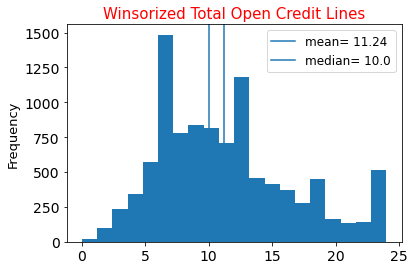

In [255]:
plot_hist(df.open_credit_lines, 'Winsorized Total Open Credit Lines')
plt.show()

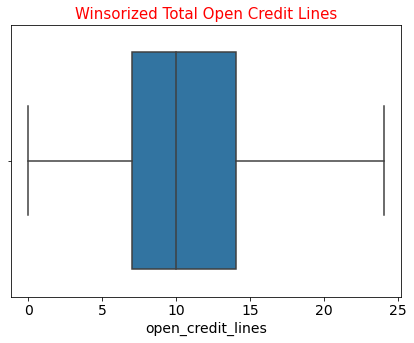

In [256]:
plot_one_boxplot(df.open_credit_lines,(7,5), 'Winsorized Total Open Credit Lines')
plt.show()

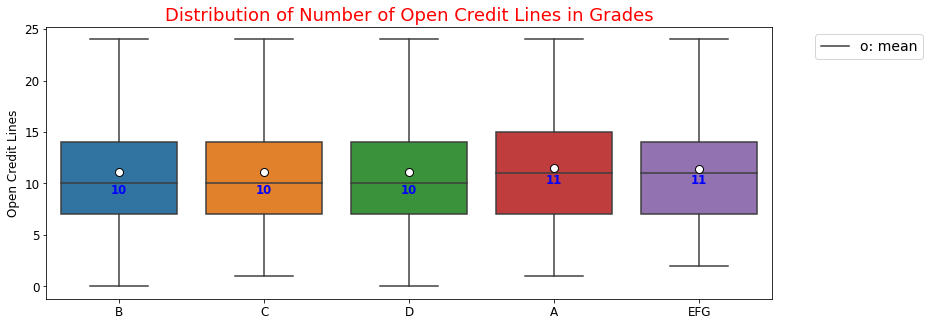

In [257]:
plt.figure(figsize=(13,5))
vertical_offset = df.open_credit_lines.median()* -0.1
medians = df.groupby('grade')['open_credit_lines'].median().sort_values().values
ranks = df.groupby('grade')['open_credit_lines'].median().sort_values().index
plot_boxplot(df.grade, df.open_credit_lines, ranks, vertical_offset, medians
             , 'Open Credit Lines','Distribution of Number of Open Credit Lines in Grades',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.05,1))
plt.show()

### Almost 50% of total credit lines were open. Borrowers with grade A loans, had few more open credits than other grades.

--------------

### total_credit_limit
Total available credit, e.g. if only credit cards, then the total of all the credit limits. This excluded a mortgage.

In [258]:
df.total_credit_limit.head()

0    70795
1    28800
2    24193
3    25400
4    69839
Name: total_credit_limit, dtype: int64

In [259]:
df.total_credit_limit.isna().sum()

0

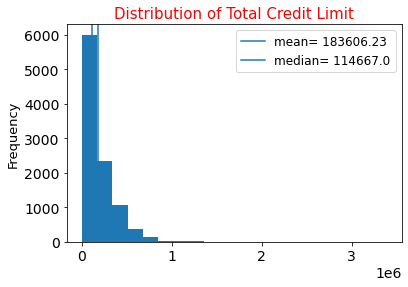

In [260]:
plot_hist(df.total_credit_limit, 'Distribution of Total Credit Limit')
plt.show()

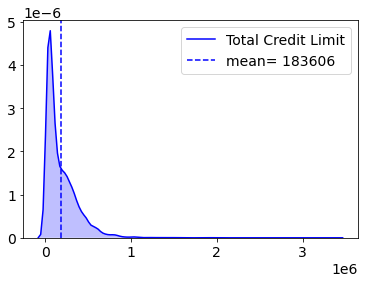

In [261]:
plot_kde(df.total_credit_limit, 'blue', True, 'Total Credit Limit')
plt.legend()
plt.show()

In [262]:
lower_bound = round(df.total_credit_limit.mean() - 3 * df.total_credit_limit.std(),0)
upper_bound = round(df.total_credit_limit.mean() + 3 * df.total_credit_limit.std(),0)
(lower_bound, upper_bound)

(-379292.0, 746504.0)

In [263]:
100 * (df.total_credit_limit > upper_bound).sum()/ len(df)

1.47

### Only 1.47% of total credit limits were greater than upper limit of 746,504$, which those values replaced with upper limit.

In [264]:
df.loc[df.total_credit_limit > upper_bound, 'total_credit_limit']= upper_bound

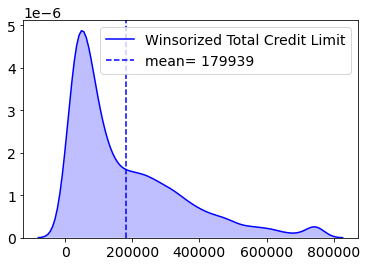

In [265]:
plot_kde(df.total_credit_limit, 'blue', True, 'Winsorized Total Credit Limit')
plt.legend()
plt.show()

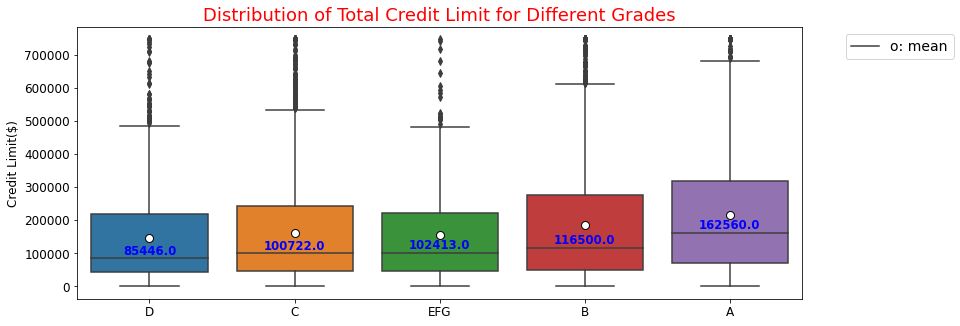

In [266]:
plt.figure(figsize=(13,5))
vertical_offset = df.total_credit_limit.median()* 0.1
medians = df.groupby('grade')['total_credit_limit'].median().sort_values().values
ranks = df.groupby('grade')['total_credit_limit'].median().sort_values().index
plot_boxplot(df.grade, df.total_credit_limit, ranks, vertical_offset, medians
             , 'Credit Limit($)','Distribution of Total Credit Limit for Different Grades',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.05,1))
plt.show()

### Median of total credit limit for grade A was higher that other grades by at least 64k dollars.

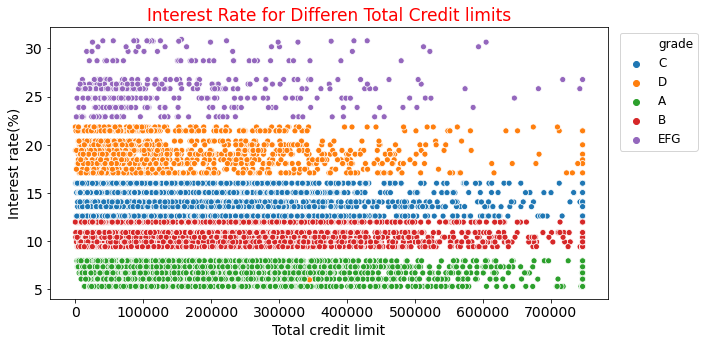

In [267]:
plt.figure(figsize= (10,5))
plot_scatter(df.total_credit_limit, df.interest_rate, df.grade, 'Total credit limit', 'Interest rate(%)'
             , 'Interest Rate for Differen Total Credit limits')
plt.show()

### Interest rate was independent from total credit limit, it was dependent to the grade.

--------

### total_credit_utilized
Total credit balance, excluding a mortgage.

In [268]:
df.total_credit_utilized.head()

0    38767
1     4321
2    16000
3     4997
4    52722
Name: total_credit_utilized, dtype: int64

In [269]:
df.total_credit_utilized.isna().sum()

0

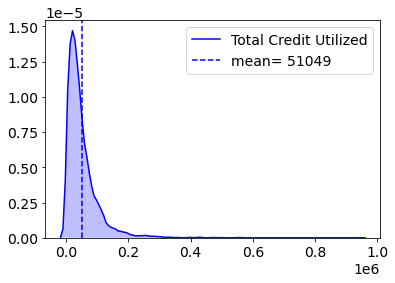

In [270]:
plot_kde(df.total_credit_utilized, 'blue', True, 'Total Credit Utilized')
plt.legend()
plt.show()

In [271]:
lower_bound = round(df.total_credit_utilized.mean() - 3 * df.total_credit_utilized.std(),0)
upper_bound = round(df.total_credit_utilized.mean() + 3 * df.total_credit_utilized.std(),0)
(lower_bound, upper_bound)

(-109861.0, 211959.0)

In [272]:
100 * (df.total_credit_utilized > upper_bound).sum()/ len(df)

1.75

### Only 1.75% of total credit utilized values were greater than upper limit of 211,959 dollars, which those values replaced with upper limit.

In [273]:
df.loc[df.total_credit_utilized > upper_bound, 'total_credit_utilized']= upper_bound

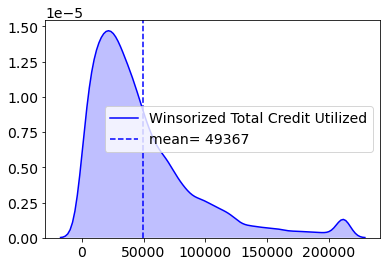

In [274]:
plot_kde(df.total_credit_utilized, 'blue', True, 'Winsorized Total Credit Utilized')
plt.legend()
plt.show()

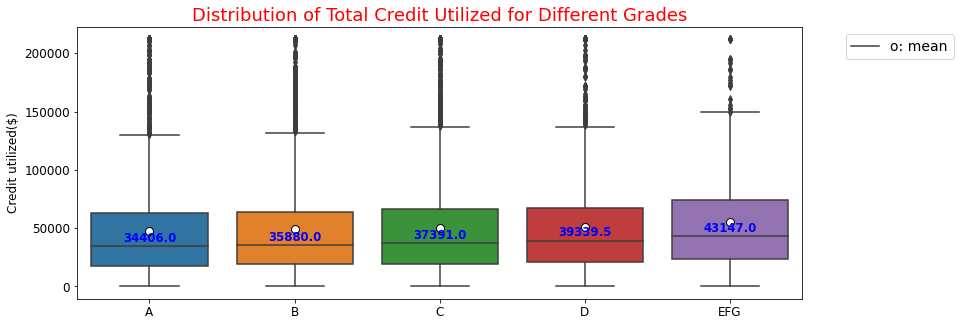

In [275]:
plt.figure(figsize=(13,5))
vertical_offset = df.total_credit_utilized.median()* 0.1
medians = df.groupby('grade')['total_credit_utilized'].median().sort_values().values
ranks = df.groupby('grade')['total_credit_utilized'].median().sort_values().index
plot_boxplot(df.grade, df.total_credit_utilized, ranks, vertical_offset, medians
             , 'Credit utilized($)','Distribution of Total Credit Utilized for Different Grades',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.05,1))
plt.show()

### The lowest median of total credit utilized belonged to borrowers of loans with grade A.  Borrowers of loans with grade EFG had median of credit utilized equaled to 43,147 dollars which was  at least 3800 dollars greater than other groups.

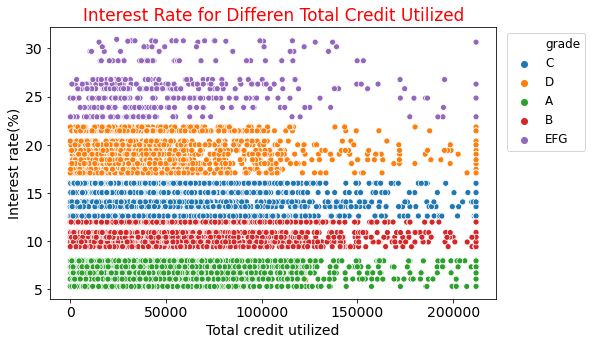

In [276]:
plt.figure(figsize= (8,5))
plot_scatter(df.total_credit_utilized, df.interest_rate, df.grade, 'Total credit utilized', 'Interest rate(%)'
             , 'Interest Rate for Differen Total Credit Utilized')
plt.show()

---------------

### num_collections_last_12m

In [277]:
df.num_collections_last_12m.head()

0    0
1    0
2    0
3    0
4    0
Name: num_collections_last_12m, dtype: int64

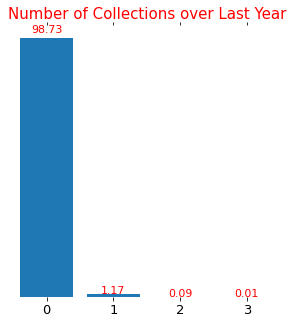

In [278]:
num_collections = 100 * df.num_collections_last_12m.value_counts(normalize= True, dropna= False)
plot_bars(num_collections.index, num_collections, 'Number of Collections over Last Year', (5,5),0)
plt.xticks(num_collections.index, fontsize=13)
plt.show()

In [279]:
grade_n_collections = pd.DataFrame(round(100 * df.groupby('grade')['num_collections_last_12m']\
                                         .value_counts(normalize=True),2))
grade_n_collections.columns= ['pct']
grade_n_collections.reset_index(inplace= True)
grade_n_collections = pd.pivot_table(grade_n_collections, index= ['grade'], columns= ['num_collections_last_12m'], values=['pct'])
grade_n_collections = grade_n_collections.reset_index()
grade_n_collections.columns = ['grade',0,1,2,3]
grade_n_collections

,grade,0,1,2,3
0,A,99.31,0.65,0.04,NaN
1,B,98.85,1.12,NaN,0.03
2,C,98.34,1.43,0.23,NaN
3,D,98.27,1.66,0.07,NaN
4,EFG,98.52,1.23,0.25,NaN


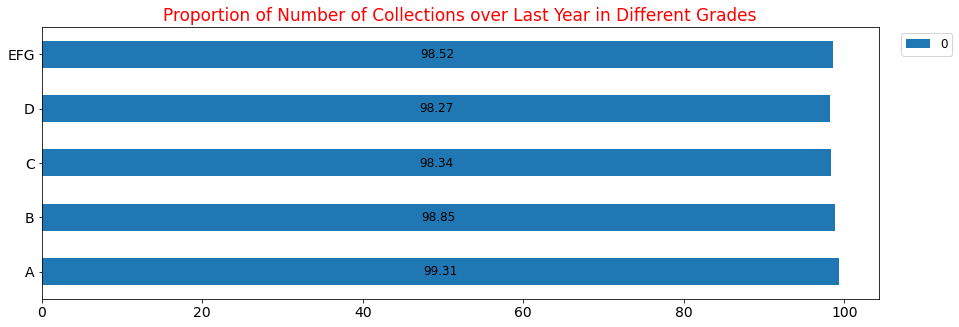

In [280]:
grade_n_collections= grade_n_collections[['grade', 0]]
plot_stackedbarh(grade_n_collections, np.arange(len(grade_n_collections)), ['A','B','C','D','EFG']\
                 ,'Proportion of Number of Collections over Last Year in Different Grades')
plt.show()

### It doesn't seem that number of collections over last year impacted the grade, since almost 99% of borrowers had zero collections in that period.

In [281]:
default_n_collect = pd.DataFrame(round(100 * df.groupby('default')['num_collections_last_12m']\
                                         .value_counts(normalize=True),2))
default_n_collect.columns= ['pct']
default_n_collect.reset_index(inplace= True)
default_n_collect = pd.pivot_table(default_n_collect, index= ['default'], columns= ['num_collections_last_12m'], values=['pct'])
default_n_collect = default_n_collect.reset_index()
default_n_collect.columns = ['default',0,1,2,3]
default_n_collect.fillna(0, inplace= True)
default_n_collect

,default,0,1,2,3
0,0,98.73,1.17,0.09,0.01
1,1,100.00,0.00,0.00,0.00


### Borrowers with default loans had zero number of collections over last 12 months.

--------------

### total_collection_amount_ever
The total amount that the appllicant has had against them in collections.

In [282]:
df.total_collection_amount_ever.value_counts(normalize= True, dropna= False).head()

0      0.8635
100    0.0012
50     0.0010
96     0.0009
150    0.0009
Name: total_collection_amount_ever, dtype: float64

In [283]:
default_total_collect = df.groupby('default')['total_collection_amount_ever'].mean().sort_values()
default_total_collect

default
0    183.868608
1    848.714286
Name: total_collection_amount_ever, dtype: float64

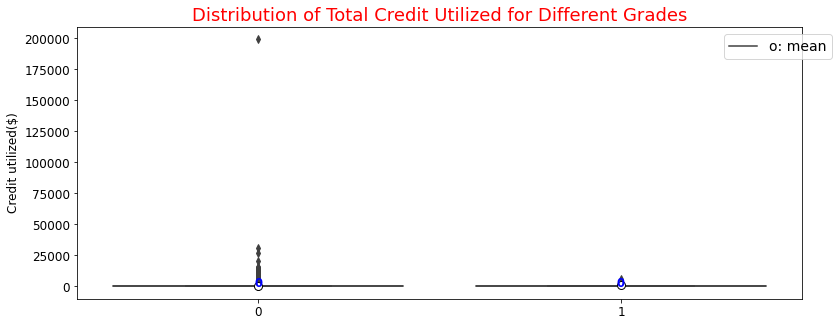

In [284]:
plt.figure(figsize=(13,5))
vertical_offset = df.total_collection_amount_ever.median()* 0.1
medians = df.groupby('default')['total_collection_amount_ever'].median().sort_values().values
ranks = df.groupby('default')['total_collection_amount_ever'].median().sort_values().index
plot_boxplot(df.default, df.total_collection_amount_ever, ranks, vertical_offset, medians
             , 'Credit utilized($)','Distribution of Total Credit Utilized for Different Grades',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.05,1))
plt.show()

In [285]:
(df.loc[df.default == 0,'total_collection_amount_ever'] >0).sum()

1363

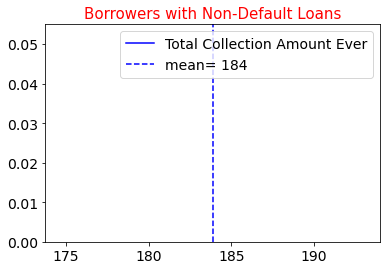

In [286]:
plot_kde(df.loc[df.default == 0,'total_collection_amount_ever'], 'blue', True, 'Total Collection Amount Ever')
plt.title('Borrowers with Non-Default Loans', color= 'red',fontsize=15)
plt.legend()
plt.show()

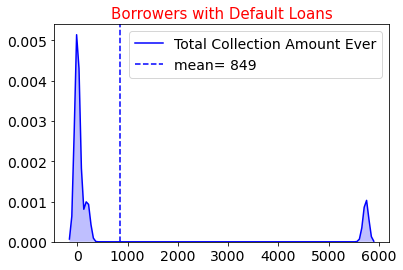

In [287]:
plot_kde(df.loc[df.default == 1,'total_collection_amount_ever'], 'blue', True, 'Total Collection Amount Ever')
plt.title('Borrowers with Default Loans', color= 'red',fontsize=15)
plt.legend()
plt.show()

-----

## -----------Accounts

### num_satisfactory_accounts
'Accounts in good standing, or satisfactory accounts, are accounts that have been reported to the credit bureau(s) as paid on time and in full during a reported period of time, typically up to 53 months.'

https://www.creditcards.com/credit-card-news/help/interactive-sample-credit-report-6000/#:~:text=Accounts%20in%20good%20standing%2C%20or,typically%20up%20to%2053%20months.

In [288]:
df.num_satisfactory_accounts.head()

0    10
1    14
2    10
3     4
4    16
Name: num_satisfactory_accounts, dtype: int64

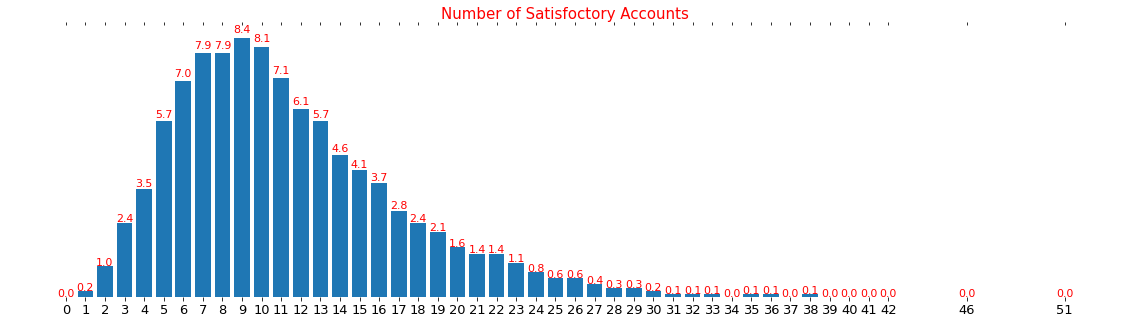

In [289]:
satisfactory_accounts = round(100 * df.num_satisfactory_accounts.value_counts(normalize= True, dropna= False),1)
plot_bars(satisfactory_accounts.index, satisfactory_accounts, 'Number of Satisfoctory Accounts', (20,5),0)
plt.xticks(satisfactory_accounts.index, fontsize=13)
plt.show()

In [290]:
q1 = df.num_satisfactory_accounts.quantile(0.25)
q3 = df.num_satisfactory_accounts.quantile(0.75)
IQR = q3-q1
lower_limit= q1 - 1.5 * IQR
upper_limit= q3 + 1.5 * IQR
(lower_limit , upper_limit)

(-3.5, 24.5)

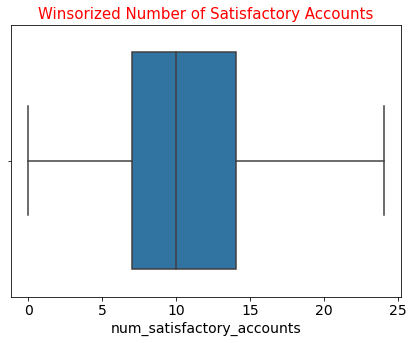

In [291]:
df.loc[df.num_satisfactory_accounts > int(upper_limit), 'num_satisfactory_accounts'] = int(upper_limit)
plot_one_boxplot(df.num_satisfactory_accounts,(7,5), 'Winsorized Number of Satisfactory Accounts')
plt.show()

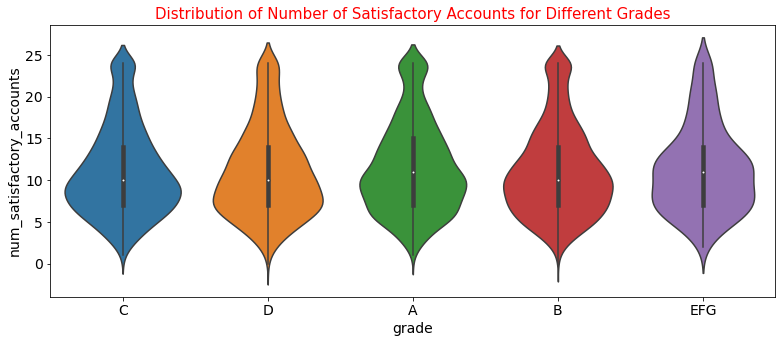

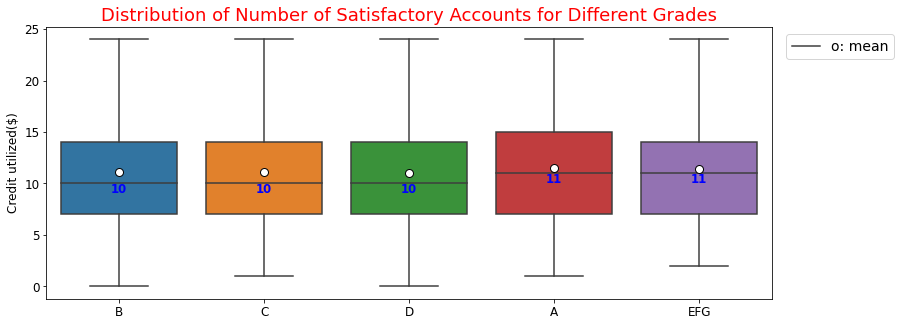

In [292]:
grade_satis_acc = df[['grade','num_satisfactory_accounts']]
plot_violin(grade_satis_acc.grade, grade_satis_acc.num_satisfactory_accounts\
            , (13,5), 'Distribution of Number of Satisfactory Accounts for Different Grades')

plt.figure(figsize=(13,5))
vertical_offset = grade_satis_acc.num_satisfactory_accounts.median()* -0.09
medians = grade_satis_acc.groupby('grade')['num_satisfactory_accounts'].median().sort_values().values
ranks = grade_satis_acc.groupby('grade')['num_satisfactory_accounts'].median().sort_values().index
plot_boxplot(grade_satis_acc.grade, grade_satis_acc.num_satisfactory_accounts, ranks, vertical_offset, medians
             , 'Credit utilized($)','Distribution of Number of Satisfactory Accounts for Different Grades',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.01,1))
plt.show()


### Distribution of number of satisfactory accounts were similar among different loan grades.Distribution of number of satisfactory accounts were similar among different loan grades.

-----

### num_accounts_30d_past_due 

In [293]:
df.num_accounts_30d_past_due.head()

0    0
1    0
2    0
3    0
4    0
Name: num_accounts_30d_past_due, dtype: int64

In [294]:
df.num_accounts_30d_past_due.value_counts(dropna= False)

0    9999
1       1
Name: num_accounts_30d_past_due, dtype: int64

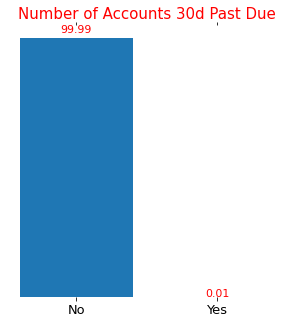

In [295]:
accounts_30d_past_due = 100 * df.num_accounts_30d_past_due.value_counts(normalize= True, dropna= False)
plot_bars(accounts_30d_past_due.index, accounts_30d_past_due, 'Number of Accounts 30d Past Due', (5,5),0)
plt.xticks(accounts_30d_past_due.index, ['No', 'Yes'],fontsize=13)
plt.show()

### only one of the borrowers had one account with 30 days past due. This feature is not informative, let's drop it.

In [296]:
df = df.drop(columns= ['num_accounts_30d_past_due'], axis=0)

-----------------

### num_accounts_120d_past_due
Number of current accounts that are 120 days past due.

In [297]:
df.num_accounts_120d_past_due.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: num_accounts_120d_past_due, dtype: float64

In [298]:
accounts_120d_late = pd.DataFrame(100 * df.num_accounts_120d_past_due.value_counts(normalize= True, dropna= False))
accounts_120d_late.reset_index(inplace= True)
accounts_120d_late.columns = ['num_accounts_120d_past_due','pct']
accounts_120d_late.head()

,num_accounts_120d_past_due,pct
0,0.0,96.82
1,NaN,3.18


In [299]:
round(100 * df.loc[df.num_accounts_120d_past_due.isna() == 0, 'grade'].value_counts(normalize= True),2)

B      30.19
C      26.31
A      25.10
D      14.52
EFG     3.88
Name: grade, dtype: float64

In [300]:
round(100 * df.loc[df.num_accounts_120d_past_due.isna() == True, 'grade'].value_counts(normalize= True),2)

B      35.85
C      33.33
D      12.58
EFG     9.12
A       9.12
Name: grade, dtype: float64

### only 3% of values were null and about 97% of values were 0.  Replacing the null values with 0 makes the variable useless in building predictive models, so let's drop it.

In [301]:
df = df.drop(columns=['num_accounts_120d_past_due'], axis= 0)

-----------

### months_since_90d_late

In [302]:
df.months_since_90d_late.head()

0    38.0
1     NaN
2    28.0
3     NaN
4     NaN
Name: months_since_90d_late, dtype: float64

In [303]:
months_since_90d_late = pd.DataFrame(100 * df.months_since_90d_late.value_counts(normalize= True, dropna= False))
months_since_90d_late.reset_index(inplace= True)
months_since_90d_late.columns = ['months_since_90d_late','pct']
months_since_90d_late.head()

,months_since_90d_late,pct
0,NaN,77.15
1,34.0,0.48
2,45.0,0.45
3,60.0,0.44
4,67.0,0.43


In [304]:
df = df.drop(columns=['months_since_90d_late'], axis= 0)

### --------   Delinquency

### delinq_2y
Delinquencies on lines of credit in the last 2 year.

'Credit card delinquency occurs when a cardholder falls behind on making required monthly payments. While being 30 days late is generally considered delinquent.'
https://www.investopedia.com/articles/pf/11/intro-to-credit-card-delinquency.asp

In [305]:
df.delinq_2y.head()

0    0
1    0
2    0
3    0
4    0
Name: delinq_2y, dtype: int64

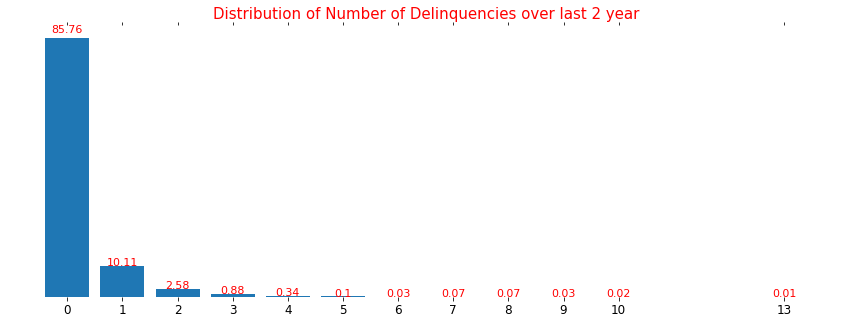

In [306]:
delinq_2y = round(100 * df.delinq_2y.value_counts(normalize= True, dropna= False),2)
plot_bars(delinq_2y.index, delinq_2y, 'Distribution of Number of Delinquencies over last 2 year', (15,5), 0)
plt.xticks(delinq_2y.index)
plt.show()

### Only 1.55% of borrowers had deliquencies for 3 to 13 times.

In [307]:
df.delinq_2y = df.delinq_2y.apply(lambda x: 2 if x in np.arange(2, 14) else x)

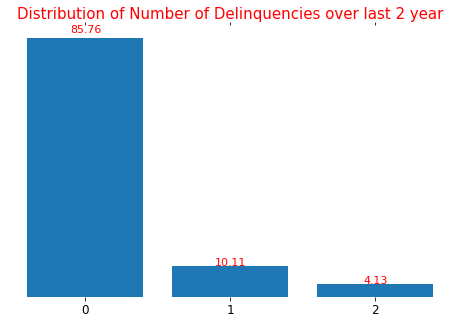

In [308]:
delinq_2y = round(100 * df.delinq_2y.value_counts(normalize= True, dropna= False),2)
plot_bars(delinq_2y.index, delinq_2y, 'Distribution of Number of Delinquencies over last 2 year', (8,5), 0)
plt.xticks(delinq_2y.index)
plt.show()

In [309]:
grade_delinq = pd.DataFrame(round(100 * df.groupby('grade')['delinq_2y'].value_counts(normalize= True, dropna= False),1))
grade_delinq.columns= ['pct']
grade_delinq.reset_index(inplace= True)
grade_delinq = pd.pivot_table(grade_delinq, index= ['grade'], columns= 'delinq_2y', values= ['pct'])
grade_delinq.reset_index(inplace= True)
grade_delinq.columns= ['grade', '0_delinq', '1_delinq', '2_delinq']
grade_delinq

,grade,0_delinq,1_delinq,2_delinq
0,A,91.7,6.4,1.9
1,B,85.7,10.1,4.2
2,C,83.6,11.5,4.9
3,D,80.9,13.3,5.7
4,EFG,81.7,12.6,5.7


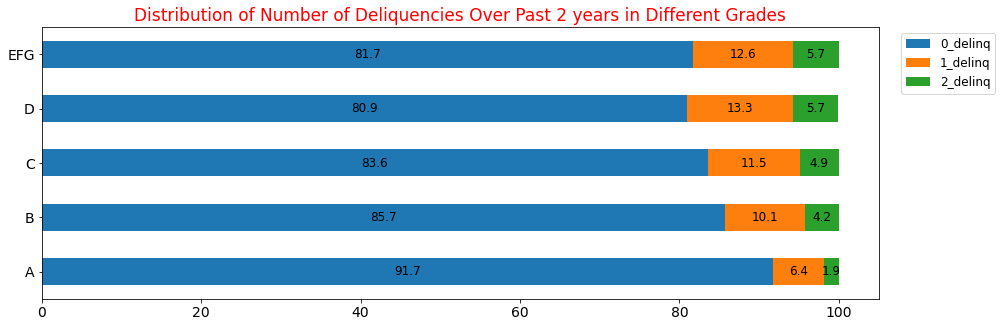

In [310]:
plot_stackedbarh(grade_delinq, np.arange(len(grade_delinq)), ['A', 'B','C','D','EFG']\
                 ,'Distribution of Number of Deliquencies Over Past 2 years in Different Grades')
plt.show()

### Borrowers with zero number of delinquencies had higher portions in receiving low risk loans. Borrowers with positive number of delinquencies had higher portions in receiving high risk loans.

-------

### months_since_last_delinq

In [311]:
df.months_since_last_delinq.head()

0    38.0
1     NaN
2    28.0
3     NaN
4     NaN
Name: months_since_last_delinq, dtype: float64

In [312]:
round(100*df.months_since_last_delinq.value_counts(normalize= True, dropna= False),2).head()

NaN     56.58
25.0     0.87
9.0      0.86
24.0     0.85
36.0     0.83
Name: months_since_last_delinq, dtype: float64

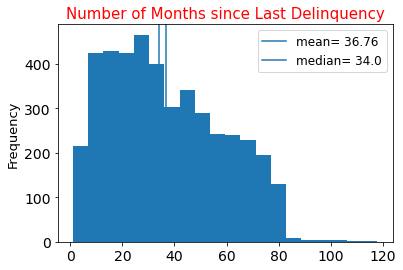

In [313]:
plot_hist(df.months_since_last_delinq, 'Number of Months since Last Delinquency')
plt.show()

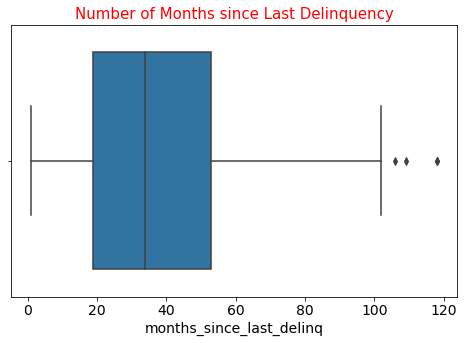

In [314]:
plot_one_boxplot(df.months_since_last_delinq, (8,5), 'Number of Months since Last Delinquency')
plt.show()

In [315]:
q1 = df.months_since_last_delinq.quantile(0.25)
q3 = df.months_since_last_delinq.quantile(0.75)
IQR = q3-q1
lower_limit= q1 - 1.5 * IQR
upper_limit= q3 + 1.5 * IQR
(lower_limit , upper_limit)


(-32.0, 104.0)

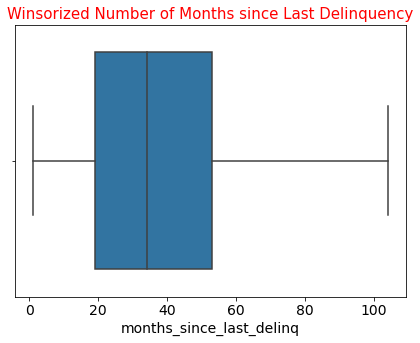

In [316]:
df.loc[df.months_since_last_delinq > int(upper_limit), 'months_since_last_delinq'] = int(upper_limit)

plot_one_boxplot(df.months_since_last_delinq,(7,5), 'Winsorized Number of Months since Last Delinquency')
plt.show()

In [317]:
months_since_last_delinq = pd.DataFrame(round(100*df.months_since_last_delinq\
                                              .value_counts(normalize= True, dropna= False),2))
months_since_last_delinq.reset_index(inplace= True)
months_since_last_delinq.columns= ['months_since_last_delinq', 'pct']
months_since_last_delinq.head()

,months_since_last_delinq,pct
0,NaN,56.58
1,25.0,0.87
2,9.0,0.86
3,24.0,0.85
4,23.0,0.83


In [318]:
df.loc[(df.delinq_2y != '0') ,'months_since_last_delinq'].isna().sum()

5658

In [319]:
df.loc[(df.delinq_2y == '0'),'months_since_last_delinq'].isna().sum()

0

In [320]:
df.loc[df.months_since_last_delinq.isna() == True,'delinq_2y'].value_counts()

0    5646
1       7
2       5
Name: delinq_2y, dtype: int64

#### There were 12 borrowers who had delinquencies over the past 2 years and their months_since_last_delinq were null. 

### About 57% values were null. let's drop it.

In [321]:
df = df.drop(columns= ['months_since_last_delinq'], axis=0)

-------------------

### current_accounts_delinq
Number of accounts where the applicant is currently delinquent.

In [322]:
df.current_accounts_delinq.head()

0    0
1    0
2    0
3    0
4    0
Name: current_accounts_delinq, dtype: int64

In [323]:
df.current_accounts_delinq.value_counts(dropna= False)

0    9999
1       1
Name: current_accounts_delinq, dtype: int64

### only one of the borrowers had one current account delinquent. This feature is not informative, let's drop it.

In [324]:
df = df.drop(columns= ['current_accounts_delinq'], axis=0)

-----------------------

### paid_late_fees

In [325]:
100 * df.paid_late_fees.value_counts(normalize= True, dropna= False).head()

0.00     99.48
15.00     0.19
30.00     0.03
23.31     0.03
16.76     0.02
Name: paid_late_fees, dtype: float64

In [326]:
df.groupby('default')['paid_late_fees'].value_counts(normalize= True, dropna= False)

default  paid_late_fees
0        0.00              0.994796
         15.00             0.001901
         23.31             0.000300
         30.00             0.000300
         16.76             0.000200
         45.12             0.000200
         2.00              0.000100
         15.52             0.000100
         16.23             0.000100
         16.63             0.000100
         19.07             0.000100
         19.92             0.000100
         20.17             0.000100
         21.10             0.000100
         22.58             0.000100
         24.91             0.000100
         25.56             0.000100
         25.64             0.000100
         26.49             0.000100
         30.33             0.000100
         30.41             0.000100
         30.75             0.000100
         32.70             0.000100
         32.82             0.000100
         36.60             0.000100
         36.67             0.000100
         42.91             0.000100
    

### All borrowers with default loans and 99.5% of borrowers with non-default loans had no paid late fees.
this columns is not informative, let's drop it.

In [327]:
df = df.drop(columns= ['paid_late_fees'], axis=0)

----

### paid_interest

In [334]:
df.paid_interest.head()

0    1015.19
1     150.49
2     106.43
3     566.15
4     754.80
Name: paid_interest, dtype: float64

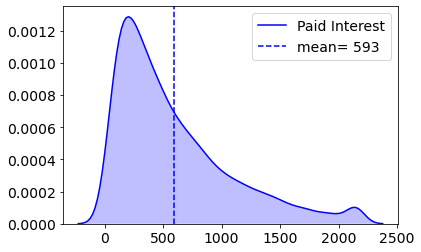

In [335]:
plot_kde(df.paid_interest, 'blue', True, 'Paid Interest')
plt.legend()
plt.show()

In [336]:
upper_bound= df.paid_interest.mean()+ 3* df.paid_interest.std()
upper_bound

2063.9924794744884

In [337]:
df.loc[df.paid_interest > upper_bound,'paid_interest'] = upper_bound

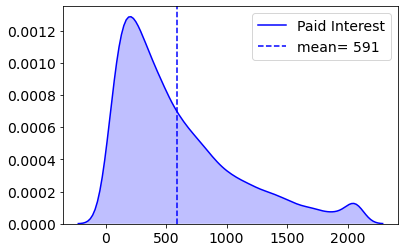

In [338]:
plot_kde(df.paid_interest, 'blue', True, 'Paid Interest')
plt.legend()
plt.show()

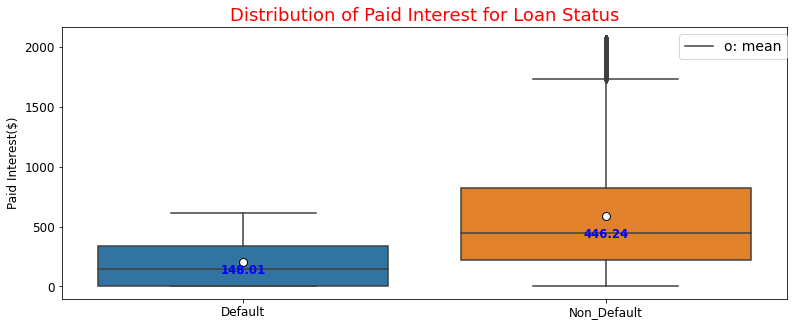

In [339]:
plt.figure(figsize=(13,5))
vertical_offset = df.paid_interest.median()* -0.09
medians = df.groupby('default')['paid_interest'].median().sort_values().values
ranks = df.groupby('default')['paid_interest'].median().sort_values().index
plot_boxplot(df.default, df.paid_interest, ranks, vertical_offset, medians
             , 'Paid Interest($)','Distribution of Paid Interest for Loan Status',0)
plt.legend(["o: mean"], bbox_to_anchor= (1.01,1))
plt.xticks([0,1], ['Default', 'Non_Default'])
plt.show()

------------------------

### tax_liens

'A tax lien is a legal claim against the assets of an individual or business that fails to pay taxes owed to the government. In general, a lien serves to guarantee payment of a debt such as a loan, or in this case, taxes. If the obligation is not satisfied, the creditor may proceed to seize the assets.'
https://www.investopedia.com/terms/t/taxlien.asp#:~:text=A%20tax%20lien%20is%20a,proceed%20to%20seize%20the%20assets.

In [340]:
df.tax_liens.head()

0    0
1    0
2    0
3    1
4    0
Name: tax_liens, dtype: int64

In [341]:
df.tax_liens.value_counts(normalize= True, dropna= False)

0     0.9754
1     0.0165
2     0.0048
3     0.0018
4     0.0007
5     0.0005
7     0.0001
6     0.0001
52    0.0001
Name: tax_liens, dtype: float64

In [342]:
df.groupby('default')['tax_liens'].value_counts(normalize= True, dropna= False)

default  tax_liens
0        0            0.975483
         1            0.016411
         2            0.004803
         3            0.001801
         4            0.000700
         5            0.000500
         6            0.000100
         7            0.000100
         52           0.000100
1        0            0.857143
         1            0.142857
Name: tax_liens, dtype: float64

### More than 97% of borrowers with non-default loans and more than 85% of borrowers with default loans had zero tax liens.

-----------------

In [343]:
df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership',
       'individual_annual_income', 'individual_income_verification',
       'individual_debt_to_income', 'joint_annual_income',
       'joint_income_verification', 'joint_debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment', 'grad

In [344]:
title = df[['original_grade', 'emp_title', 'default']]
title.to_csv('title.csv', index= False)

In [345]:
df = df.drop(columns= ['emp_title','state_cat','grade', 'emp_length'], axis=0)
df.rename(columns = {'original_grade':'grade', 'original_emp_length': 'emp_length'}, inplace= True)

In [346]:
df.to_csv('cleaned_loans_full_schema.csv', index= False)

------------